In [2]:
# Install RDKit.
!pip install rdkit
!pip install rdkit mordred pandas numpy

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
from rdkit.Chem import Descriptors, rdMolDescriptors

In [3]:
import numpy
print(numpy.__version__)


1.21.5


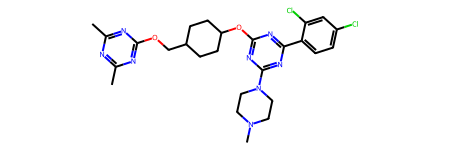

In [4]:
itracon = Chem.MolFromSmiles('CC1=NC(=NC(=N1)OCC2CCC(CC2)OC3=NC(=NC(=N3)C4=CC=C(C=C4Cl)Cl)N5CCN(CC5)C)C')
itracon

In [32]:
smiles2 = Chem.MolToSmiles(itracon)
smiles2

'Cc1nc(C)nc(OCC2CCC(Oc3nc(-c4ccc(Cl)cc4Cl)nc(N4CCN(C)CC4)n3)CC2)n1'

In [4]:
albendaz = Chem.MolFromSmiles('COC(=O)C1=NC2=C(C=CC(=C2)N1)SCCC')
albendaz
mw = Descriptors.MolWt(albendaz)
mw

250.323

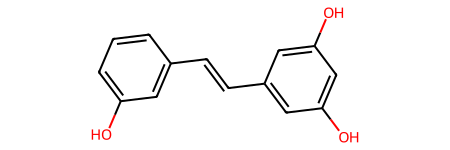

In [5]:
resveratrol = Chem.MolFromSmiles('OC1=CC=CC(/C=C/C2=CC(O)=CC(O)=C2)=C1')
resveratrol

In [7]:
random_mw = Descriptors.MolWt(Chem.MolFromSmiles('CC(C)C1C(=O)CC2C(C1O)(CC(C1=CC(=O)C=C2C1(C)O)F)C(=O)CO'))
random_mw


380.41200000000015

In [15]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [16]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

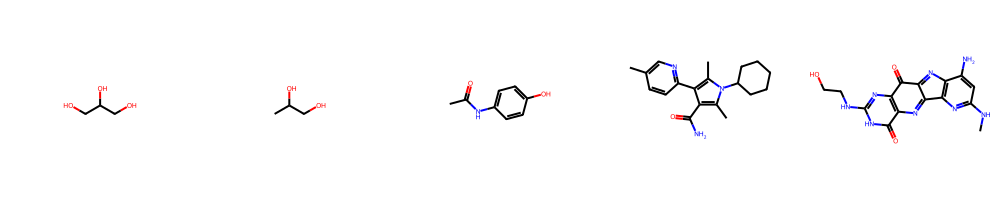

In [17]:
smiles_list = ['OCC(O)CO', 'CC(O)CO', 'CC(=O)NC1=CC=C(C=C1)O', 'CC1=C(C(=C(N1C2CCCCC2)C)C(=O)N)C3=NC=C(C=C3)C', 'CNC1=NC2=C(C(=C1)N)N=C3C2=NC4=C(C3=O)N=C(NC4=O)NCCO']

mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=5)
img

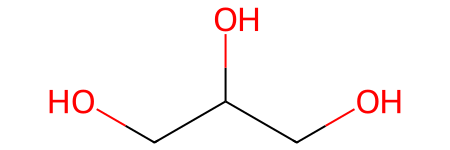

In [18]:
glycerine = mol_list[0]
glycerine

In [19]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycerine, 2, nBits=1024, bitInfo=bi)
fp_arr  = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[20:24:42] DEPRECATION WARNING: please use MorganGenerator


[1, 80, 222, 227, 482, 807, 953, 993, 1014]

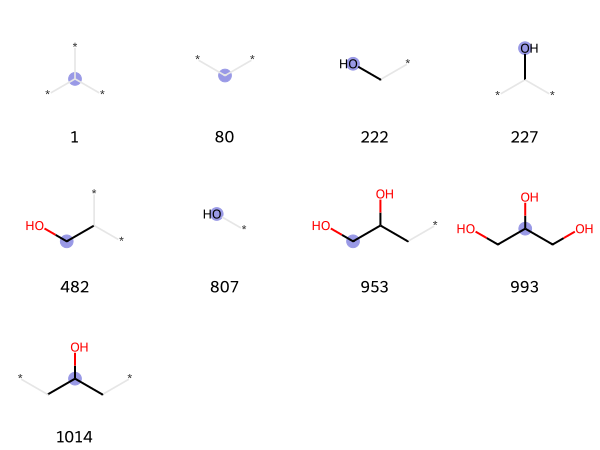

In [20]:
prints = [(glycerine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

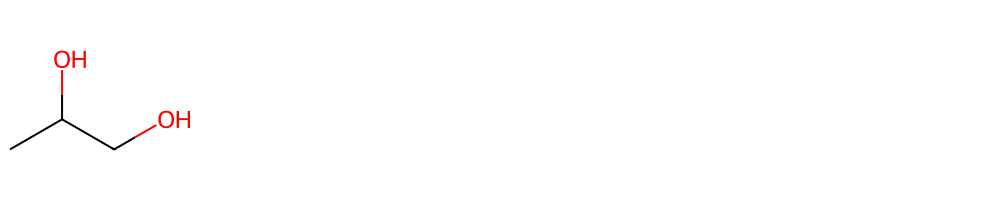

In [21]:
propylene_glycol = mol_list[1]
img = Draw.MolsToGridImage([propylene_glycol], molsPerRow=5)
img

In [22]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(glycerine, 2, nBits=1024, bitInfo=bi)
print('gly', list(fp2.GetOnBits()))
print('propy', list(fp.GetOnBits()))

common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(common)
print(combined)
print(len(common)/len(combined))
print(DataStructs.TanimotoSimilarity(fp, fp2))

gly [1, 80, 222, 227, 482, 807, 953, 993, 1014]
propy [1, 80, 222, 227, 482, 807, 953, 993, 1014]
{1, 482, 227, 993, 807, 80, 1014, 953, 222}
{1, 482, 227, 993, 807, 80, 1014, 953, 222}
1.0
1.0


[20:24:44] DEPRECATION WARNING: please use MorganGenerator


In [32]:
from rdkit import Chem

# Define the SMILES string
smiles = "C1=CC(=C(C(=C1)Cl)Cl)C2=C(N=C(N=N2)N)N"

# Create an RDKit molecule object
mol = Chem.MolFromSmiles(smiles)

# Kekulize the molecule (this will convert aromatic bonds to alternating single/double bonds)
Chem.Kekulize(mol)

# Output the kekulized SMILES
kekulized_smiles = Chem.MolToSmiles(mol)
print(kekulized_smiles)

Nc1nc(N)c(-c2c(Cl)c(Cl)ccc2)nn1


The following code below performs conversion to kekulised SMILES format much more swiftly:
=
=
=

In [29]:
from rdkit import Chem

smiles_list = [ 
    "CC(C)(C)NC(=O)C(C)(C)c1ccc(cc1S(=O)(=O)NC(=O)C(F)(F)F)Cl"  
]

kekulized_smiles = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    # Kekulize in RDKit
    Chem.Kekulize(mol, clearAromaticFlags=True)
    # Now convert back to SMILES with the kekuleSmiles flag
    kek_smi = Chem.MolToSmiles(mol, kekuleSmiles=True)
    kekulized_smiles.append(kek_smi)

for original, kek in zip(smiles_list, kekulized_smiles):
    print("Original:", original)
    print("Kekulized:", kek)
    print("---")


Original: CC(C)(C)NC(=O)C(C)(C)c1ccc(cc1S(=O)(=O)NC(=O)C(F)(F)F)Cl
Kekulized: CC(C)(C)NC(=O)C(C)(C)C1=CC=C(Cl)C=C1S(=O)(=O)NC(=O)C(F)(F)F
---


In [30]:
from rdkit import Chem

# Correct canonical SMILES for Cefpodoxime proxetil (PubChem CID 6917712)
cefpodoxime_smi = "CCCOC(=O)CSc1nnc(c(n1C)C(=O)N2CCCCC2C(=O)O)c1ccc(cc1)OC"

mol = Chem.MolFromSmiles(cefpodoxime_smi)
if mol is None:
    print("Failed to parse SMILES.")
else:
    print("Parsed successfully!")
    try:
        Chem.Kekulize(mol, clearAromaticFlags=True)
        kek_smi = Chem.MolToSmiles(mol, kekuleSmiles=True)
        print("Kekulized SMILES:", kek_smi)
    except Exception as e:
        print("Kekulization failed:", e)



Failed to parse SMILES.


[15:34:20] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12


In [8]:
from rdkit import Chem

# Define the naproxen SMILES string
naproxen_smiles = "CC(C(=O)O)c1ccc2cc(OC)ccc2c1"

# Create an RDKit molecule object
mol = Chem.MolFromSmiles(naproxen_smiles)

# Kekulize the molecule (this will convert aromatic bonds to alternating single/double bonds)
Chem.Kekulize(mol)

# Output the kekulized SMILES
kekulized_smiles = Chem.MolToSmiles(mol)
print(kekulized_smiles)

COc1cc2ccc(C(C)C(=O)O)cc2cc1


In [33]:
from rdkit import Chem

itraconazole_smiles = "CC1=NC(=NC(=N1)OCC2CCC(CC2)OC3=NC(=NC(=N3)C4=CC=C(C=C4Cl)Cl)N5CCN(CC5)C)C"
mol = Chem.MolFromSmiles(itraconazole_smiles)

if mol is None:
    print("Error: SMILES parsing failed. Check the input string.")
else:
    # Force kekulization by clearing aromatic flags (useful for heterocycles with ambiguous Kekulé forms)
    Chem.Kekulize(mol, clearAromaticFlags=True)
    kekulized_smiles = Chem.MolToSmiles(mol)
    print("Kekulized SMILES:", kekulized_smiles)



Kekulized SMILES: CC1=NC(C)=NC(OCC2CCC(OC3=NC(N4CCN(C)CC4)=NC(C4=CC=C(Cl)C=C4Cl)=N3)CC2)=N1


In [37]:
from rdkit import Chem

# Aromatic SMILES for albendazole
albendazole_smiles = "COC(=O)C1=NC2=C(C=CC(=C2)N1)SCCC"
mol = Chem.MolFromSmiles(albendazole_smiles)
if mol is None:
    raise ValueError("SMILES parsing failed. Please check the input.")

# Kekulize the molecule—clearing aromatic flags to force a Kekulé representation
Chem.Kekulize(mol, clearAromaticFlags=True)

# Get the kekulized SMILES (this will now use explicit single and double bonds)
kekulized_smiles = Chem.MolToSmiles(mol)
print("Kekulized SMILES:", kekulized_smiles)


Kekulized SMILES: CCCSC1=CC=C2C=C1N=C(C(=O)OC)N2


In [38]:
from rdkit import Chem

# Kekulized SMILES for piroxicam
piroxicam_smiles = "CN1C(=O)C2=NC=CC(=C2S(=O)(=O)N1)O"
mol = Chem.MolFromSmiles(piroxicam_smiles)
if mol is None:
    raise ValueError("SMILES parsing failed. Please check the input string.")

# Kekulize the molecule (clearing aromatic flags if needed)
Chem.Kekulize(mol, clearAromaticFlags=True)

# Retrieve the kekulized SMILES string
kekulized_smiles = Chem.MolToSmiles(mol)
print("Kekulized SMILES for piroxicam:", kekulized_smiles)


Kekulized SMILES for piroxicam: CN1NS(=O)(=O)C2=C(O)C=CN=C2C1=O


In [39]:
from rdkit import Chem

# Kekulized SMILES for resveratrol
resveratrol_smiles = "OC1=CC(=CC(=C1)O)/C=C/C2=CC(=CC=C2)O"
mol = Chem.MolFromSmiles(resveratrol_smiles)
if mol is not None:
    kekulized_smiles = Chem.MolToSmiles(mol, kekuleSmiles=True)
    print("Kekulized SMILES:", kekulized_smiles)
else:
    print("Error: The SMILES could not be parsed.")


Kekulized SMILES: OC1=CC=CC(/C=C/C2=CC(O)=CC(O)=C2)=C1


In [1]:
from rdkit import Chem

# Define the danazol SMILES (using a known canonical/aromatic form)
danazol_smiles = "C#CC1(O)CCC2C1(C)CCC1C2CCC2=Cc3c(CC12C)cno3"

# Create an RDKit molecule object
mol = Chem.MolFromSmiles(danazol_smiles)
if mol is None:
    raise ValueError("SMILES parsing failed.")

# Kekulize the molecule (this converts aromatic bonds to explicit alternating single/double bonds)
Chem.Kekulize(mol, clearAromaticFlags=True)

# Retrieve the kekulized SMILES string
kekulized_smiles = Chem.MolToSmiles(mol, kekuleSmiles=True)
print("Kekulized SMILES for danazol:", kekulized_smiles)


Kekulized SMILES for danazol: C#CC1(O)CCC2C3CCC4=CC5=C(C=NO5)CC4(C)C3CCC21C


In [6]:
from rdkit import Chem

griseofulvin_smiles = "COC1=CC(=C(C=C1OC)Cl)C2CC(=O)OC(C2)C"

mol = Chem.MolFromSmiles(griseofulvin_smiles)
if mol is None:
    raise ValueError("SMILES parsing failed")

Chem.Kekulize(mol, clearAromaticFlags=True)

kekulized_smiles = Chem.MolToSmiles(mol, kekuleSmiles=True)
print("Kekulized SMILES for griseofulvin:", kekulized_smiles)

Kekulized SMILES for griseofulvin: COC1=CC(Cl)=C(C2CC(=O)OC(C)C2)C=C1OC


In [9]:
from rdkit.Chem import Descriptors

# Print all descriptor names and the associated function
for desc_name, desc_func in Descriptors._descList:
    print(desc_name)



MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
SPS
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EState_

In [11]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

# Sample list of SMILES (replace with your own data)
smiles_list = ['CCO']  

def calc_rdkit_descriptors(mol):
    """
    Computes all available RDKit descriptors for a single molecule
    and returns them as a dictionary {descriptor_name: value}.
    """
    desc_values = {}
    for desc_name, desc_func in Descriptors._descList:
        desc_values[desc_name] = desc_func(mol)
    return desc_values

# Convert SMILES to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Calculate descriptors for each molecule
data = []
for mol in mols:
    desc_dict = calc_rdkit_descriptors(mol)
    data.append(desc_dict)

# Create a DataFrame of descriptors
df_descriptors = pd.DataFrame(data, columns=data[0].keys())

# Show the first few rows
print(df_descriptors.head())


   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           7.569444        7.569444               0.25            0.25   

        qed  SPS   MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.406808  6.0  46.069          40.021   46.041865                   20   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0             0           0                  0             0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0            0             0                 0        0  

[1 rows x 217 columns]


In [5]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.feature_selection import VarianceThreshold

def get_clean_descriptors(
    smiles_list,
    variance_threshold=0.01,
    correlation_threshold=0.90
):
    """
    Given a list of SMILES strings, compute all RDKit descriptors,
    remove near-zero variance and highly correlated descriptors,
    and return a clean descriptor DataFrame.

    Parameters
    ----------
    smiles_list : list of str
        A list of SMILES strings representing your molecules.

    variance_threshold : float, optional
        Threshold for removing descriptors with near-zero variance.
        Descriptors whose variance is below this threshold are removed.

    correlation_threshold : float, optional
        Threshold for removing highly correlated descriptors.
        If the absolute correlation between two descriptors
        exceeds this value, one of them is removed.

    Returns
    -------
    df_descriptors_final : pandas.DataFrame
        A DataFrame of molecular descriptors after removing
        near-zero variance and highly correlated features.
        Each row corresponds to one molecule in the input list.
    """

    # 1. Convert SMILES to RDKit Molecules
    mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

    # 2. Compute RDKit descriptors for each molecule
    def calc_rdkit_descriptors(mol):
        """Compute all RDKit descriptors for a single molecule."""
        desc_values = {}
        for desc_name, desc_func in Descriptors._descList:
            desc_values[desc_name] = desc_func(mol)
        return desc_values

    data = []
    for mol in mols:
        if mol is None:
            # Handle invalid SMILES (mol=None)
            data.append({desc_name: np.nan for desc_name, _ in Descriptors._descList})
        else:
            data.append(calc_rdkit_descriptors(mol))

    df_descriptors = pd.DataFrame(data)

    # 3. Remove near-zero variance descriptors
    selector = VarianceThreshold(threshold=variance_threshold)
    selector.fit(df_descriptors.fillna(0))  # fill NaNs to avoid errors
    nzv_mask = selector.get_support(indices=True)
    df_nzv = df_descriptors.iloc[:, nzv_mask]

    # 4. Identify and drop highly correlated descriptors
    corr_matrix = df_nzv.corr().abs()
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [
        col for col in upper_tri.columns if any(upper_tri[col] > correlation_threshold)
    ]
    df_descriptors_final = df_nzv.drop(columns=to_drop)

    return df_descriptors_final

# ------------------------------
# Example usage
if __name__ == "__main__":
    # Replace these with your actual SMILES strings
    example_smiles = [
        "CC(C)Cc1ccc(cc1)C(C)C(=O)O",
        "CC(C)C1C(=O)CC2C(C1O)(CC(C1=CC(=O)C=C2C1(C)O)F)C(=O)CO",
        "CN1NS(=O)(=O)C2=C(O)C=CN=C2C1=O",
        "CC(=O)C1(CCC2C1(CCC1C(C2CC(C1O)O)O)C)O",
        "CCCSC1=CC=C2C=C1N=C(C(=O)OC)N2",
        "CC(C)C[C@H](C(=O)NCc1ccc(cc1)c1ccccc1C(=N)N=N)NC(=O)CCC(=O)O",
        "CCOC(=O)C1=C(C)NC(=C(C1c1ccccc1[N+](=O)[O-])C)C(=O)OCC",
        "COCCOC(=O)C1=C(C)NC(=C(C1c1ccccc1[N+](=O)[O-])C)C(=O)OCCOC",
        "O=C1Nc2ccccc2C2=CC=CC=C2C1=O",
        "CC1=NC(C)=NC(OCC2CCC(OC3=NC(N4CCN(C)CC4)=NC(C4=CC=C(Cl)C=C4Cl)=N3)CC2)=N1",
        "CC(C)CC(CC=C)C(=O)OC[C@@H]1CC[C@@H](CC1)C(=O)OC(C)C",
        "COc1ccc(cc1)/C=C/C(=O)CC(=O)/C=C/c1ccc(cc1)OC",
        "COc1ccc2c(c1)n(c(c2C(=O)O)C(=O)c1ccc(cc1)Cl)C",
        "COc1cc2ccc(C(C)C(=O)O)cc2cc1",
        "OC(=O)Cc1cccc(c1)Nc1c(cccc1Cl)Cl",
        "OC1=CC=CC(/C=C/C2=CC(O)=CC(O)=C2)=C1",
    ]

    df_final = get_clean_descriptors(
        example_smiles,
        variance_threshold=0.01,
        correlation_threshold=0.9
    )

    print("Final descriptor DataFrame shape:", df_final.shape)
    print(df_final.head())



Final descriptor DataFrame shape: (16, 101)
   MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0          10.762425           0.418426       -0.771658  0.821600  12.800000   
1          15.257997           0.056996       -1.871468  0.664041  41.629630   
2          11.544815           0.281250       -3.912245  0.598124  18.733333   
3          12.031192           0.007917       -1.342489  0.555623  56.666667   
4          11.422479           0.249026       -0.441443  0.659161  12.705882   

     MolWt  FpDensityMorgan1  BCUT2D_MWHI  BCUT2D_MWLOW  BCUT2D_CHGHI  ...  \
0  206.285          1.200000    16.366405      9.968472      2.123540  ...   
1  380.412          1.296296    19.144212      9.529676      2.643334  ...   
2  229.217          1.533333    32.233290     10.290480      2.355016  ...   
3  298.379          1.047619    16.334949      9.625086      2.640284  ...   
4  250.323          1.529412    32.166535     10.218241      2.178461  ...   

   fr_

In [25]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.feature_selection import VarianceThreshold

def get_clean_descriptors(
    smiles_list,
    variance_threshold=0.01,
    correlation_threshold=0.90
):
    """
    Given a list of SMILES strings, compute all RDKit descriptors,
    remove near-zero variance and highly correlated descriptors,
    and return a clean descriptor DataFrame.

    Parameters
    ----------
    smiles_list : list of str
        A list of SMILES strings representing your molecules.

    variance_threshold : float, optional
        Threshold for removing descriptors with near-zero variance.
        Descriptors whose variance is below this threshold are removed.

    correlation_threshold : float, optional
        Threshold for removing highly correlated descriptors.
        If the absolute correlation between two descriptors
        exceeds this value, one of them is removed.

    Returns
    -------
    df_descriptors_final : pandas.DataFrame
        A DataFrame of molecular descriptors after removing
        near-zero variance and highly correlated features.
        Each row corresponds to one molecule in the input list.
    """

    # 1. Convert SMILES to RDKit Molecules
    mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

    # 2. Compute RDKit descriptors for each molecule
    def calc_rdkit_descriptors(mol):
        """Compute all RDKit descriptors for a single molecule."""
        desc_values = {}
        for desc_name, desc_func in Descriptors._descList:
            desc_values[desc_name] = desc_func(mol)
        return desc_values

    data = []
    for mol in mols:
        if mol is None:
            # Handle invalid SMILES by inserting NaN values for all descriptors
            data.append({desc_name: np.nan for desc_name, _ in Descriptors._descList})
        else:
            data.append(calc_rdkit_descriptors(mol))

    df_descriptors = pd.DataFrame(data)

    # 3. Remove near-zero variance descriptors
    selector = VarianceThreshold(threshold=variance_threshold)
    selector.fit(df_descriptors.fillna(0))  # fill NaNs to avoid errors
    nzv_mask = selector.get_support(indices=True)
    df_nzv = df_descriptors.iloc[:, nzv_mask]

    # 4. Identify and drop highly correlated descriptors
    corr_matrix = df_nzv.corr().abs()
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [
        col for col in upper_tri.columns if any(upper_tri[col] > correlation_threshold)
    ]
    df_descriptors_final = df_nzv.drop(columns=to_drop)

    return df_descriptors_final


# ------------------------------
# Example usage
if __name__ == "__main__":
    # Replace these with your full set of 16 SMILES:
    smiles_list = [
        "CC(C)Cc1ccc(cc1)C(C)C(=O)O",
        "CC(C)C1C(=O)CC2C(C1O)(CC(C1=CC(=O)C=C2C1(C)O)F)C(=O)CO",
        "CN1NS(=O)(=O)C2=C(O)C=CN=C2C1=O",
        "CC(=O)C1(CCC2C1(CCC1C(C2CC(C1O)O)O)C)O",
        "CCCSC1=CC=C2C=C1N=C(C(=O)OC)N2",
        "CC(C)C[C@H](C(=O)NCc1ccc(cc1)c1ccccc1C(=N)N=N)NC(=O)CCC(=O)O",
        "CCOC(=O)C1=C(C)NC(=C(C1c1ccccc1[N+](=O)[O-])C)C(=O)OCC",
        "COCCOC(=O)C1=C(C)NC(=C(C1c1ccccc1[N+](=O)[O-])C)C(=O)OCCOC",
        "O=C1Nc2ccccc2C2=CC=CC=C2C1=O",
        "CC1=NC(C)=NC(OCC2CCC(OC3=NC(N4CCN(C)CC4)=NC(C4=CC=C(Cl)C=C4Cl)=N3)CC2)=N1",
        "CC(C)CC(CC=C)C(=O)OC[C@@H]1CC[C@@H](CC1)C(=O)OC(C)C",
        "COc1ccc(cc1)/C=C/C(=O)CC(=O)/C=C/c1ccc(cc1)OC",
        "COc1ccc2c(c1)n(c(c2C(=O)O)C(=O)c1ccc(cc1)Cl)C",
        "COc1cc2ccc(C(C)C(=O)O)cc2cc1",
        "OC(=O)Cc1cccc(c1)Nc1c(cccc1Cl)Cl",
        "OC1=CC=CC(/C=C/C2=CC(O)=CC(O)=C2)=C1",
    ]

    # Generate a clean descriptor DataFrame
    df_final = get_clean_descriptors(
        smiles_list,
        variance_threshold=0.01,
        correlation_threshold=0.62
    )

    print("Final descriptor DataFrame shape:", df_final.shape)
    pd.set_option('display.max_rows', None)       # Show all rows
    pd.set_option('display.max_columns', None)    # Show all columns (optional)

    print(df_final)
    
    df_final.to_csv("clean_descriptors.csv", index=False)
    print("\nSaved cleaned descriptors to 'clean_descriptors.csv'.")



Final descriptor DataFrame shape: (16, 14)
    MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0           10.762425           0.418426       -0.771658  0.821600  12.800000   
1           15.257997           0.056996       -1.871468  0.664041  41.629630   
2           11.544815           0.281250       -3.912245  0.598124  18.733333   
3           12.031192           0.007917       -1.342489  0.555623  56.666667   
4           11.422479           0.249026       -0.441443  0.659161  12.705882   
5           12.672840           0.121726       -1.062954  0.200443  11.484848   
6           12.592485           0.137447       -0.799717  0.463170  16.666667   
7           12.880396           0.018249       -0.872343  0.255149  16.064516   
8           11.893017           0.453657       -0.581111  0.592762  10.823529   
9            6.502592           0.017771        0.017771  0.413592  20.394737   
10          12.261031           0.008154       -0.106536  0.457810

In [33]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.feature_selection import VarianceThreshold

def get_clean_descriptors(
    smiles_list,
    variance_threshold=0.01,
    correlation_threshold=2
):
    """
    Given a list of SMILES strings, compute all RDKit descriptors,
    remove near-zero variance and highly correlated descriptors,
    and return a clean descriptor DataFrame.

    Parameters
    ----------
    smiles_list : list of str
        A list of SMILES strings representing your molecules.

    variance_threshold : float, optional
        Threshold for removing descriptors with near-zero variance.
        Descriptors whose variance is below this threshold are removed.

    correlation_threshold : float, optional
        Threshold for removing highly correlated descriptors.
        If the absolute correlation between two descriptors
        exceeds this value, one of them is removed.

    Returns
    -------
    df_descriptors_final : pandas.DataFrame
        A DataFrame of molecular descriptors after removing
        near-zero variance and highly correlated features.
        Each row corresponds to one molecule in the input list.
    """

    # 1. Convert SMILES to RDKit Molecules
    mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

    # 2. Compute RDKit descriptors for each molecule
    def calc_rdkit_descriptors(mol):
        """Compute all RDKit descriptors for a single molecule."""
        desc_values = {}
        for desc_name, desc_func in Descriptors._descList:
            desc_values[desc_name] = desc_func(mol)
        return desc_values

    data = []
    for mol in mols:
        if mol is None:
            # Handle invalid SMILES by inserting NaN values for all descriptors
            data.append({desc_name: np.nan for desc_name, _ in Descriptors._descList})
        else:
            data.append(calc_rdkit_descriptors(mol))

    df_descriptors = pd.DataFrame(data)

    # 3. Remove near-zero variance descriptors
    selector = VarianceThreshold(threshold=variance_threshold)
    selector.fit(df_descriptors.fillna(0))  # fill NaNs to avoid errors
    nzv_mask = selector.get_support(indices=True)
    df_nzv = df_descriptors.iloc[:, nzv_mask]

    # 4. Identify and drop highly correlated descriptors
    corr_matrix = df_nzv.corr().abs()
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [
        col for col in upper_tri.columns if any(upper_tri[col] > correlation_threshold)
    ]
    df_descriptors_final = df_nzv.drop(columns=to_drop)

    return df_descriptors_final


# ------------------------------
# Example usage
if __name__ == "__main__":

    # Replace 'your_dataset.csv' with the actual path to your CSV file.
    # Make sure your CSV file has a column named 'Smiles' (capital 'S').
    file_path = 'C:/Users/gagno/Downloads/molecule_dataset.csv'
    df_data = pd.read_csv(file_path)

    # Extract the SMILES strings from the 'Smiles' column
    smiles_list = df_data['Smiles'].tolist()

    # Generate a clean descriptor DataFrame
    df_final = get_clean_descriptors(
        smiles_list,
        variance_threshold=0.01,       # Adjust thresholds as needed
        correlation_threshold=2
    )

    print("Final descriptor DataFrame shape:", df_final.shape)
    # Display a preview of the cleaned descriptors
    print(df_final.head())

    # Optionally, save the resulting DataFrame to a new CSV
    df_final.to_csv("innitss.csv", index=False)
    print("\nSaved cleaned descriptors to 'innitss.csv'.")


Final descriptor DataFrame shape: (51, 185)
   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0          10.762425       10.762425           0.418426       -0.771658   
1          15.257997       15.257997           0.056996       -1.871468   
2          11.544815       11.544815           0.281250       -3.912245   
3          12.031192       12.031192           0.007917       -1.342489   
4          11.422479       11.422479           0.249026       -0.441443   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.821600  12.800000  206.285         188.141  206.130680   
1  0.664041  41.629630  380.412         355.212  380.163517   
2  0.598124  18.733333  229.217         222.161  229.015727   
3  0.555623  56.666667  298.379         272.171  298.178024   
4  0.659161  12.705882  250.323         236.211  250.077599   

   NumValenceElectrons  NumRadicalElectrons  FpDensityMorgan1  \
0                   82                    0          1.200000

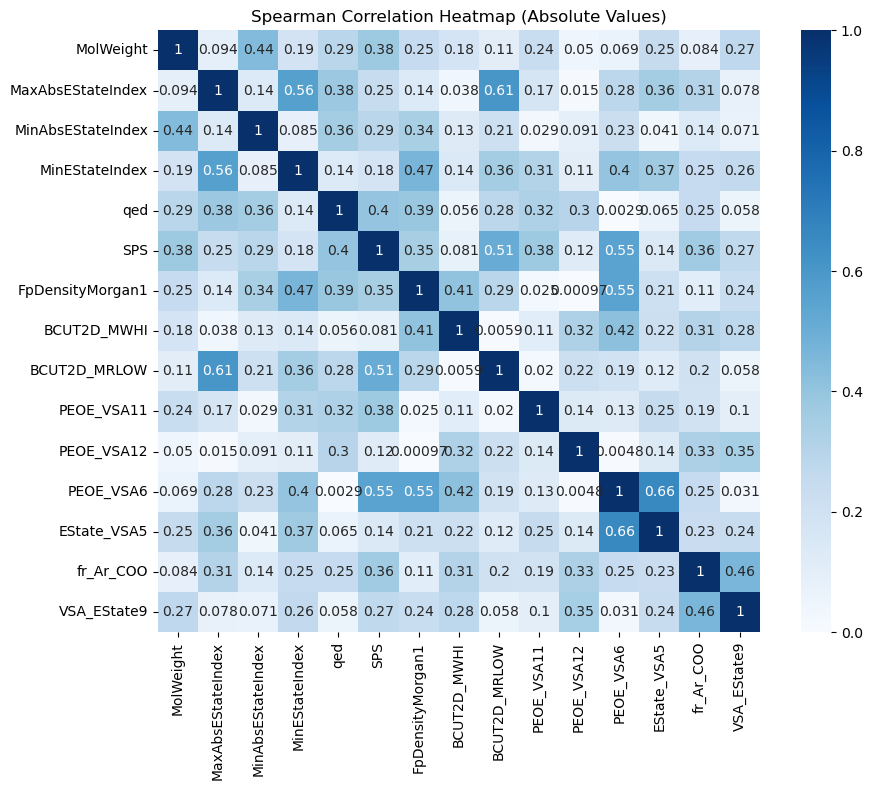

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def main():
    # 1. Load CSV data
    file_path = 'C:/Users/gagno/Downloads/molecule_features.csv'
    df = pd.read_csv(file_path)
    
    # 2. Extract the 15 features (columns C to Q -> indices 2:17)
    df_features = df.iloc[:, 2:17]
    
    # 3. Compute Spearman’s correlation (absolute values)
    corr_matrix = df_features.corr(method='spearman').abs()
    
    # 4A. Option A: Simple heatmap (no dendrogram)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        cmap="Blues",       # Darker blues for higher correlation
        annot=True,         # Show numerical values in each cell
        vmin=0, vmax=1,     # Correlation range from 0 to 1
        square=True
    )
    plt.title("Spearman Correlation Heatmap (Absolute Values)")
    plt.tight_layout()
    plt.show()
    
    # 4B. Option B: Clustermap with hierarchical clustering
    #     (uncomment the code below if you want a dendrogram)
    # sns.clustermap(
    #     corr_matrix,
    #     method="ward",    # or another linkage method (e.g. 'average')
    #     cmap="Blues",
    #     annot=True,
    #     vmin=0, vmax=1
    # )
    # plt.title("Spearman Correlation Clustermap (Absolute Values)")
    # plt.show()

if __name__ == "__main__":
    main()


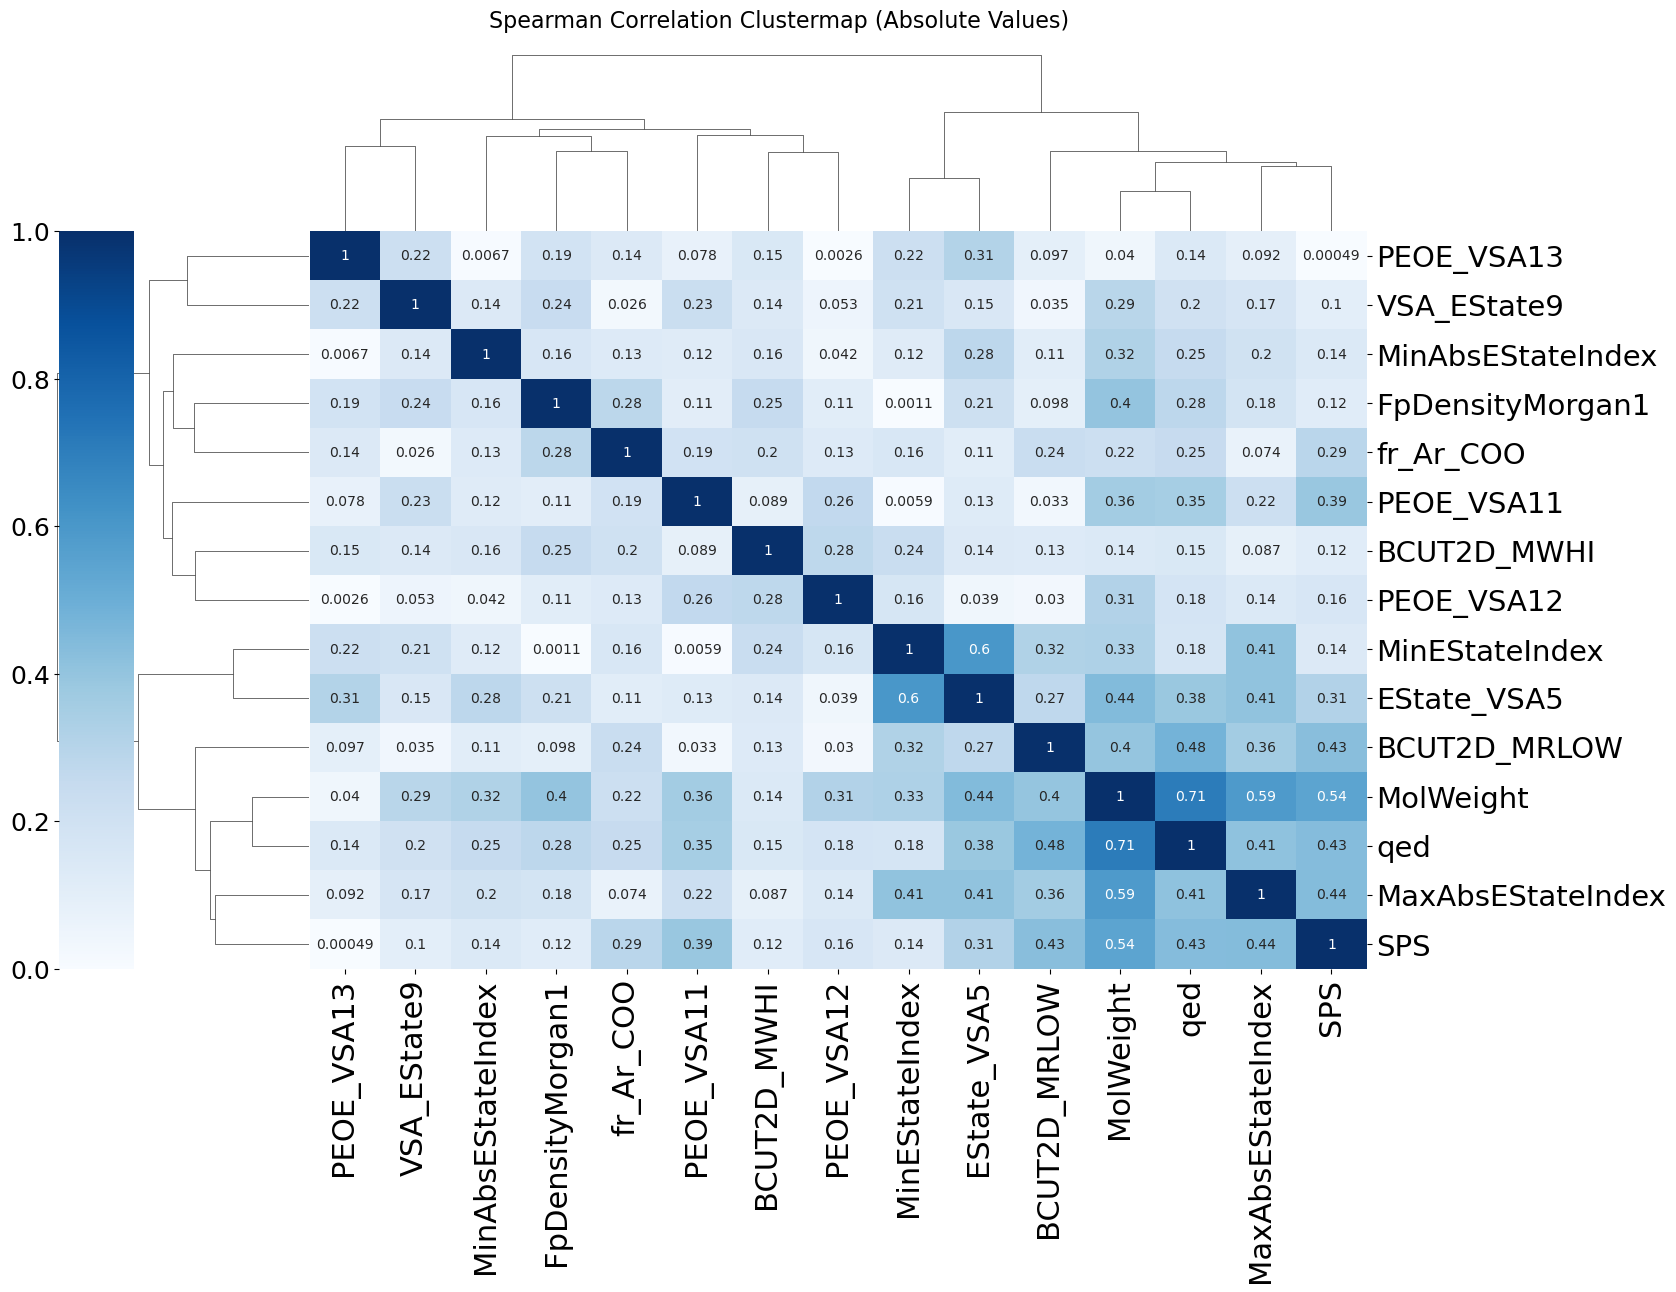

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

def main():
    # 1. Load your CSV data
    file_path = 'C:/Users/gagno/Downloads/molecule_features.csv'
    df = pd.read_csv(file_path)
    
    # 2. Extract the 15 features (columns C to Q -> indices 2:17)
    df_features = df.iloc[:, 2:17]
    
    # 3. Compute Spearman's correlation (absolute values)
    corr_matrix = df_features.corr(method='spearman').abs()
    
    # 4. Generate a Clustermap with hierarchical clustering
    # First, modify the colorbar location and size by creating a custom cbar_kws
    cbar_kws = {
        'location': 'left',  # Move colorbar to the right
        'use_gridspec': False,  # Don't use gridspec for more control
        'pad': 0.05,  # Spacing between heatmap and colorbar
        'shrink': 1.0,  # Don't shrink the colorbar (full height)
    }
    
    clustermap = sns.clustermap(
        corr_matrix,
        method="ward",     # Linkage method for hierarchical clustering
        cmap="Blues",      # Darker blues indicate stronger correlation
        annot=True,        # Display numeric correlation values
        vmin=0, vmax=1,    # Correlation range from 0 to 1
        figsize=(15, 11),
        cbar_kws=cbar_kws  # Apply custom colorbar settings
    )
    
    # Access the heatmap axis to modify font sizes
    ax = clustermap.ax_heatmap
    
    # Increase font size for x-axis (column) labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=22)
    
    # Increase font size for y-axis (row) labels
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=21)
    
    # Access and modify the colorbar
    cbar = clustermap.ax_cbar
    cbar.tick_params(labelsize=18)  # Increase colorbar tick font size
    
    # Elongate colorbar to match heatmap height
    # Get current colorbar position
    pos = cbar.get_position()
    # Get heatmap position
    heatmap_pos = ax.get_position()
    # Set colorbar position to match heatmap height
    cbar.set_position([pos.x0, heatmap_pos.y0, pos.width, heatmap_pos.height])
    
    # Adjust title
    clustermap.fig.suptitle("Spearman Correlation Clustermap (Absolute Values)", y=1.02, fontsize=16)
    
    # Save with high resolution
    plt.savefig('spearman_correlation_clustermap.png', dpi=600, bbox_inches='tight')
    
    plt.show()

if __name__ == "__main__":
    main()

Pearson Correlation Coefficient: -0.131
P-value: 3.579e-01


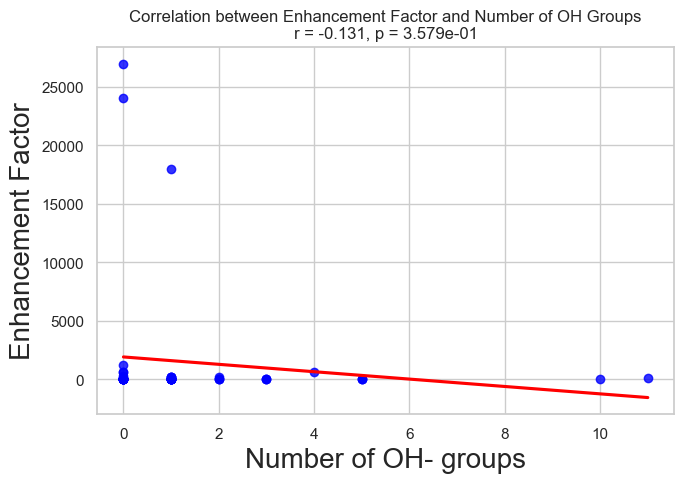

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Specify the file path
file_path = 'C:/Users/gagno/Downloads/Featureregression.csv'

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

try:
    # Load the dataset
    df = pd.read_csv(file_path)
except Exception as e:
    print("Error reading the CSV file:", e)
    raise

# Optionally inspect the DataFrame (uncomment the next line to see a preview)
# print(df.head())

# Assuming the CSV columns are named exactly "Enhancement Factor" and "# of OH- groups".
# If not, adjust the column names accordingly.
try:
    enhancement = df['Enhancement Factor']
    oh_groups = df['# of OH- groups']
except KeyError as ke:
    print("Column name not found in the CSV file. Please check the header names:", ke)
    raise

# Calculate Pearson correlation and p-value
corr_val, p_val = pearsonr(enhancement, oh_groups)
print(f"Pearson Correlation Coefficient: {corr_val:.3f}")
print(f"P-value: {p_val:.3e}")

# Create a scatter plot with a regression line
sns.set(style='whitegrid')
plt.figure(figsize=(7, 5))
sns.regplot(x='# of OH- groups', 
            y='Enhancement Factor', 
            data=df, 
            ci=None, 
            scatter_kws={'color': 'blue'}, 
            line_kws={'color': 'red'})

plt.title(f'Correlation between Enhancement Factor and Number of OH Groups\n'
          f'r = {corr_val:.3f}, p = {p_val:.3e}')
plt.xlabel('Number of OH- groups', fontsize=20)
plt.ylabel('Enhancement Factor', fontsize=20)
plt.tight_layout()
plt.show()



Pearson correlation coefficient: 0.3770
P-value: 6.3844e-03


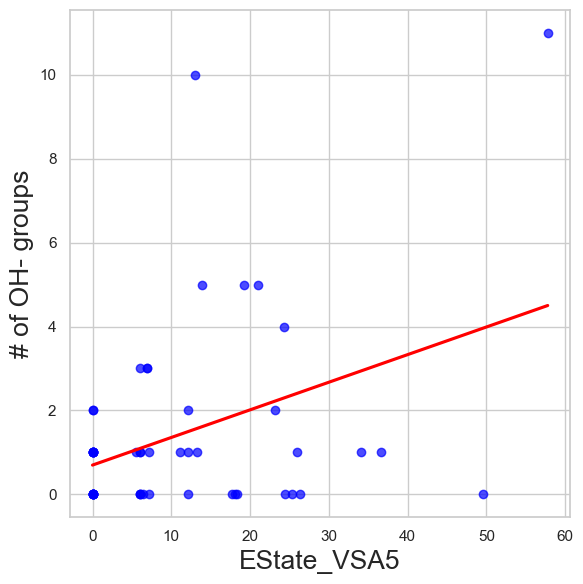

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Load the dataset
file_path = 'C:/Users/gagno/Downloads/Featureregression.csv'
df = pd.read_csv(file_path)  # Replace with your actual file name

# 2. Extract the columns for analysis
x = df["EState_VSA5"]    # Column E
y = df["# of OH- groups"]        # Column F

# 3. Compute Pearson correlation
corr_val, p_val = pearsonr(x, y)

print(f"Pearson correlation coefficient: {corr_val:.4f}")
print(f"P-value: {p_val:.4e}")

# 4. Create a scatter plot with a regression line
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))
sns.regplot(x="EState_VSA5",
            y="# of OH- groups",
            data=df,
            ci=None,          # Omits the confidence interval
            scatter_kws={'alpha':0.7, 'color':'blue'},
            line_kws={'color':'red'})

plt.title("")
plt.xlabel("EState_VSA5", fontsize=19)
plt.ylabel("# of OH- groups", fontsize=19)
plt.tight_layout()
plt.show()


Pearson correlation coefficient: 0.1671
P-value: 2.4128e-01


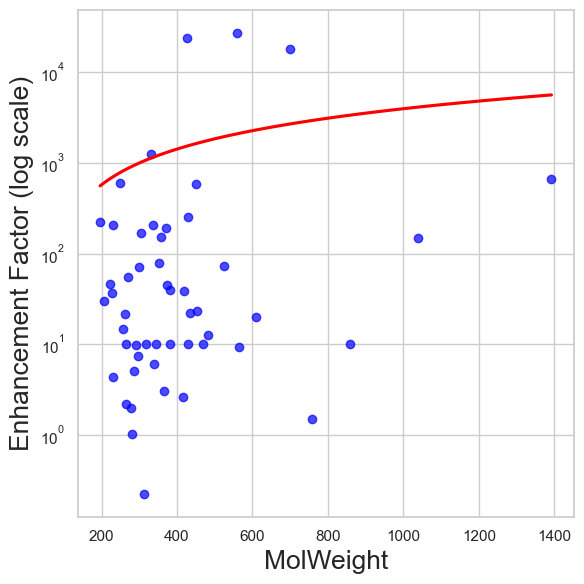

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# 1. Load the dataset (adjust filename if needed)
file_path = 'C:/Users/gagno/Downloads/Featureregression.csv'
df = pd.read_csv(file_path)

# 2. Extract columns for analysis
#    x-axis: EState_VSA5
#    y-axis: Enhancement Factor
x = df["MolWeight"]
y = df["Enhancement Factor"]

# (Optional) If 'Enhancement Factor' contains zeros or negative values,
# you must remove them or shift them to avoid log-scale errors:
# df = df[df["Enhancement Factor"] > 0]

# 3. Compute Pearson correlation on raw data
corr_val, p_val = pearsonr(x, y)

print(f"Pearson correlation coefficient: {corr_val:.4f}")
print(f"P-value: {p_val:.4e}")

# 4. Create a scatter plot with a regression line
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))  # Smaller figure size
sns.regplot(
    x="MolWeight",
    y="Enhancement Factor",
    data=df,
    ci=None,                    # No confidence interval
    scatter_kws={'alpha':0.7, 'color':'blue'},
    line_kws={'color':'red'}
)

# 5. Apply logarithmic scale to the y-axis
plt.yscale('log')

# 6. Final touches
plt.title("")
plt.xlabel("MolWeight", fontsize=19)
plt.ylabel("Enhancement Factor (log scale)", fontsize=19)
plt.tight_layout()
plt.show()


0      206.285
1      380.412
2      229.217
3      298.379
4      250.323
5      451.527
6      374.393
7      434.445
8      223.231
9      559.502
10     338.488
11     336.387
12     343.766
13     230.263
14     296.153
15     228.247
16    1037.646
17     418.618
18     453.458
19     416.949
20     523.574
21     311.425
22     358.407
23     352.394
24     317.301
25    1392.414
26     700.791
27     265.294
28     291.354
29     425.388
30     263.337
31     264.303
32     196.221
33     382.378
34     428.860
35     371.830
36     256.096
37     564.712
38     364.873
39     303.402
40     330.340
41     278.717
42     482.441
43     610.521
44     469.497
45     429.476
46     281.396
47     271.147
48     757.915
49     859.084
50     285.343
Name: MolWeight, dtype: float64
Pearson correlation coefficient: 0.5204
P-value: 9.0745e-05


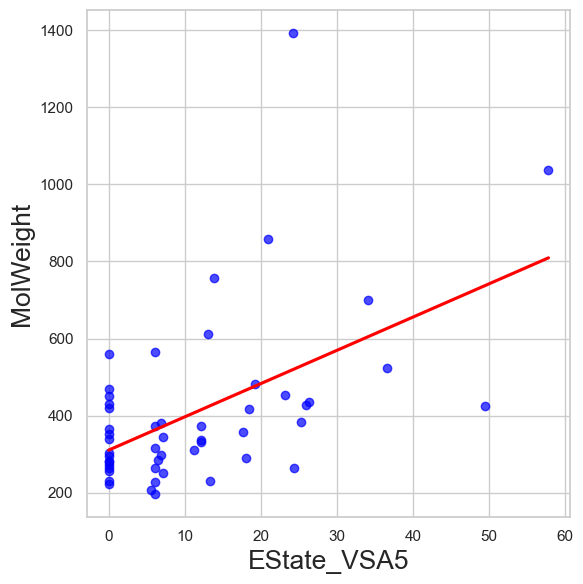

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# 1. Load the dataset (adjust filename if needed)
file_path = 'C:/Users/gagno/Downloads/Featureregression.csv'
df = pd.read_csv(file_path)

# 2. Extract columns for analysis
#    x-axis: EState_VSA5
#    y-axis: Enhancement Factor
x = df["EState_VSA5"]
y = df["MolWeight"]
print(df["MolWeight"])

# (Optional) If 'Enhancement Factor' contains zeros or negative values,
# you must remove them or shift them to avoid log-scale errors:
# df = df[df["Enhancement Factor"] > 0]

# 3. Compute Pearson correlation on raw data
corr_val, p_val = pearsonr(x, y)

print(f"Pearson correlation coefficient: {corr_val:.4f}")
print(f"P-value: {p_val:.4e}")

# 4. Create a scatter plot with a regression line
sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))  # Smaller figure size
sns.regplot(
    x="EState_VSA5",
    y="MolWeight",
    data=df,
    ci=None,                    # No confidence interval
    scatter_kws={'alpha':0.7, 'color':'blue'},
    line_kws={'color':'red'}
)

# 5. Apply logarithmic scale to the y-axis
#plt.yscale('log')

# 6. Final touches
plt.title("")
plt.xlabel("EState_VSA5", fontsize=19)
plt.ylabel("MolWeight", fontsize=19)
plt.tight_layout()
plt.show()


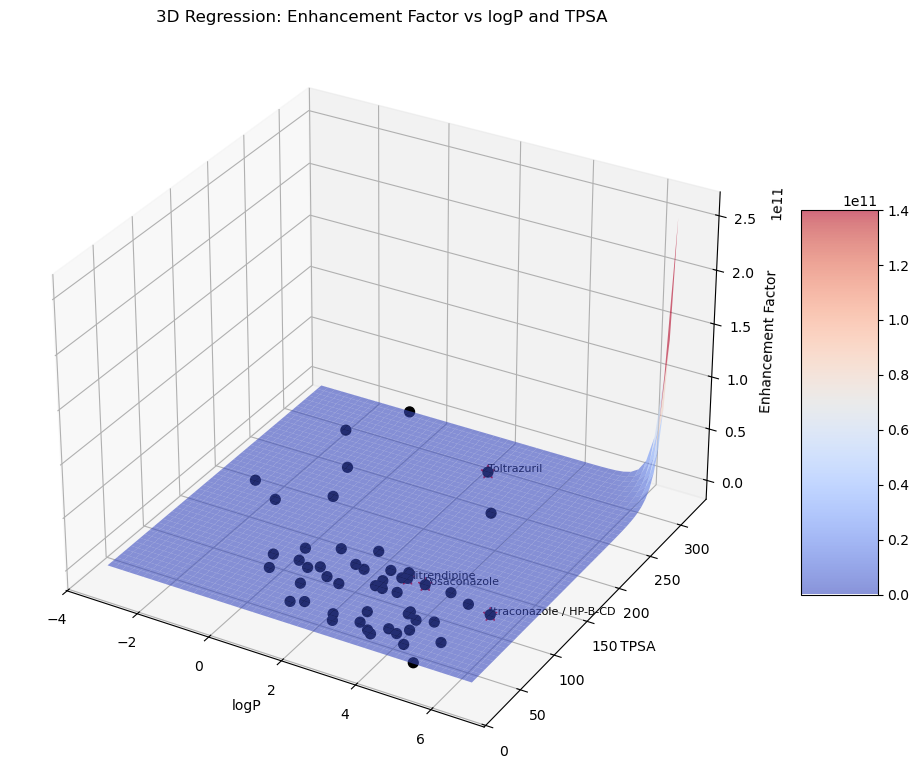

Polynomial Regression Model (degree=2):
R² score: 0.4458

Feature importance:
logP: -1.1137
logP^2: 0.2043
TPSA: -0.0220
logP TPSA: 0.0088
TPSA^2: 0.0001


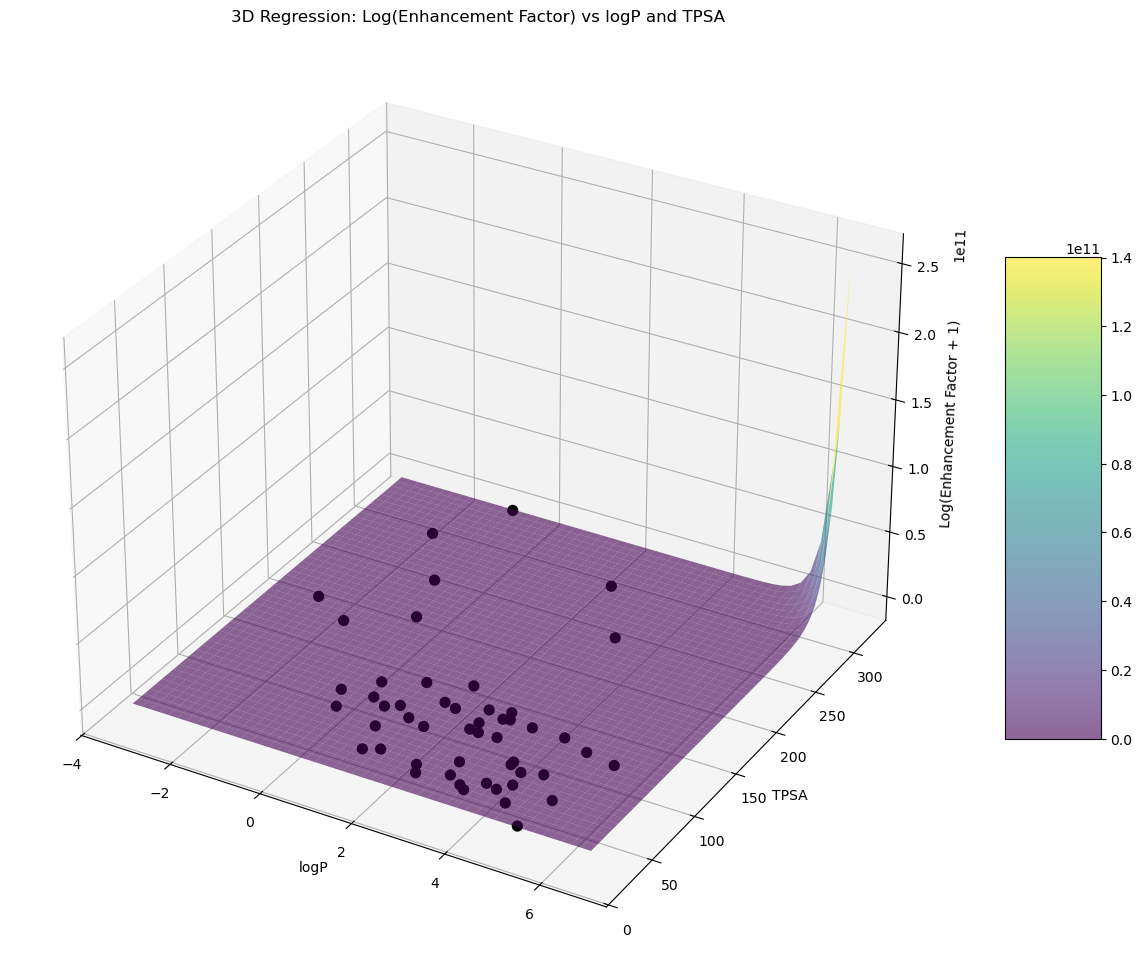

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Read the CSV file
# In a real scenario, you would use: df = pd.read_csv('Featureregression.csv')
# For this example, I'll create the dataframe from the provided data
data = {
    'ID': list(range(1, 52)),
    'Name': [
        'Ibuprofen / HP-B-CD', 'Dexamethasone / B - CD', 'Piroxicam / HP-B-CD', 
        'Hydrocortisone / HP-B-CD', 'Albendazole / RM-B-CD', 'Valtarsan / B-CD',
        'Nifedipine / HP-B-CD', 'Nimodipine / HP-B-CD', 'Carbamazepine / HP-B-CD',
        'Itraconazole / HP-B-CD', 'Simvastatin / HP-B-CD', 'Curcumin / HP-B-CD',
        'Indomethacin / HP- B - CD', 'Naproxen / HP - B - CD', 'Diclofenac / HP-B-CD',
        'Resveratrol / HP-Gamma CD', 'Amphotericin B', 'Budesonide', 'Cefixime',
        'Cefpodoxime proxetil', 'Ceftiofur', 'Danazol', 'Ketoconazole', 'Mebendazole',
        'Metronidazole benzoate', 'Paclitaxel', 'Posaconazole', 'Sulfamethoxazole',
        'Tinidazole', 'Toltrazuril', 'Tropicamide', 'Voriconazole', 'Flurbiprofen',
        'Fenofibrate', 'Bicalutamide', 'Haloperidol', 'Lamotrigine', 'Gilpizide',
        'Amlodipine', 'Carvedilol', 'Nitrendipine', 'Furosemide', 'Silymarin (Silybin A)',
        'Rutin', 'Ezetimibe', 'Efonidipine', 'Bisoprolol', 'Miconazole', 'Erythomycin',
        'Azithromycin', 'Piperine'
    ],
    'Enhancement Factor': [
        30, 10, 4.347826087, 71.4, 600, 590.783, 44.8, 22, 45.6, 27000, 6, 206,
        10, 208.7049, 7.5, 36.66666667, 150, 38.40909091, 23.02631579, 2.643153527,
        72.66666667, 0.221698113, 151.7647059, 78, 9.928571429, 666.6666667, 18000,
        2.186046512, 9.811170213, 24029.12621, 21.5, 10, 220, 40, 10.05649718,
        189.3203883, 14.70588235, 9.243243243, 3.071672355, 166.6666667, 1250, 2,
        12.5, 20, 10, 250, 1.026785714, 55, 1.5, 10, 5
    ],
    'logP': [
        3.64, 1.14, 3.07, 0.55, 2.9, 4.4, 1.82, 3.1, 2.45, 5.66, 4.68, 3.29,
        4.27, 3.18, 3.9, 3.1, -0.66, 2.7, -1.4, 2, -2.3, 4.53, 4.35, 2.74,
        1.1, 3.5, 3.7, 0.89, 0.1, 2.5, 1.6, 1.5, 4.16, 5.24, 2.68, 3.5,
        1.9, 0.4, 2.1, 3.98, 3.2, -0.13, 1.16, -1.6, 3.98, 5, 1.3, 5.1,
        -0.24, -0.64, 2.58
    ],
    'TPSA': [
        37.3, 94.83, 111.47, 94.83, 92.3, 112, 110.45, 120, 46.3, 101, 72.8, 93.1,
        68.5, 46.5, 49.3, 60.7, 319.6, 93, 158, 134, 174, 37.3, 55.1, 101.4,
        69, 221, 112, 89.6, 75.7, 271.2, 49.8, 86, 46.8, 52.5, 116.1, 40.5,
        82.3, 111.1, 107.8, 75.8, 113, 92.6, 123.5, 271.2, 72.8, 105, 44.8, 20.7,
        183.1, 224.5, 38.7
    ]
}

df = pd.DataFrame(data)

# Extract the columns of interest
X = df[['logP', 'TPSA']].values
y = df['Enhancement Factor'].values

# Log transform the enhancement factor due to high variance
# Adding a small constant to avoid log(0)
y_log = np.log1p(y)  # log(1+y)

# Create a polynomial regression model
degree = 2  # Polynomial degree
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y_log)

# Create a meshgrid for prediction
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on the grid
Z = model.predict(grid)
Z = np.expm1(Z)  # Convert back from log scale
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, alpha=0.6, 
                      linewidth=0, antialiased=True)

# Plot the original data points
scatter = ax.scatter(X[:, 0], X[:, 1], y, c='black', s=50, alpha=1)

# Highlight outliers (very high enhancement factors)
high_enhancement = y > 1000
ax.scatter(X[high_enhancement, 0], X[high_enhancement, 1], y[high_enhancement], 
           c='red', s=100, alpha=1, marker='*')

# Add labels for the outliers
for i in np.where(high_enhancement)[0]:
    ax.text(X[i, 0], X[i, 1], y[i], df['Name'][i], fontsize=8)

# Set labels and title
ax.set_xlabel('logP')
ax.set_ylabel('TPSA')
ax.set_zlabel('Enhancement Factor')
ax.set_title('3D Regression: Enhancement Factor vs logP and TPSA')

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Add a statistical summary
r2_score = model.score(X, y_log)
#plt.figtext(0.15, 0.05, f"Polynomial Regression (degree={degree})\nR² score: {r2_score:.4f}", 
           #horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

#plt.tight_layout()
plt.show()

# Print summary of the model
print(f"Polynomial Regression Model (degree={degree}):")
print(f"R² score: {r2_score:.4f}")

# Additional analysis: Feature importance
coefficients = model.named_steps['linearregression'].coef_
feature_names = model.named_steps['polynomialfeatures'].get_feature_names_out(['logP', 'TPSA'])
importance = np.abs(coefficients)

# Sort features by importance
indices = np.argsort(importance)[::-1]
print("\nFeature importance:")
for i in indices:
    if coefficients[i] != 0:
        print(f"{feature_names[i]}: {coefficients[i]:.4f}")

# Alternative visualization with log scale for better visibility
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(xx, yy, Z, cmap=cm.viridis, alpha=0.6,
                      linewidth=0, antialiased=True)

# Plot the data points with log scale
ax.scatter(X[:, 0], X[:, 1], np.log1p(y), c='black', s=50, alpha=1)

# Set labels and title
ax.set_xlabel('logP')
ax.set_ylabel('TPSA')
ax.set_zlabel('Log(Enhancement Factor + 1)')
ax.set_title('3D Regression: Log(Enhancement Factor) vs logP and TPSA')

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

Polynomial Regression Model (degree=2):
R² score: 0.0334

Feature importance:
OH_groups: -0.4403
OH_groups COOH: 0.0952
OH_groups^2: 0.0370
COOH: -0.0067
COOH^2: -0.0067


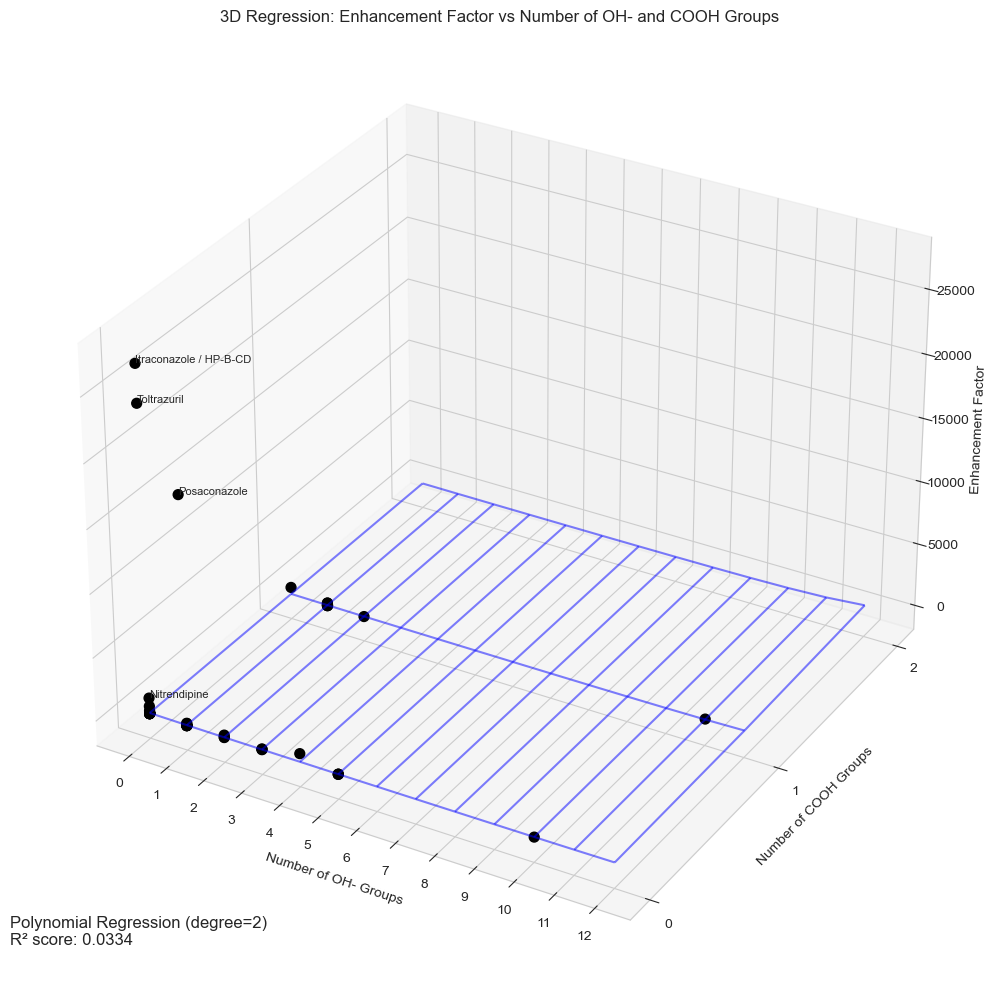

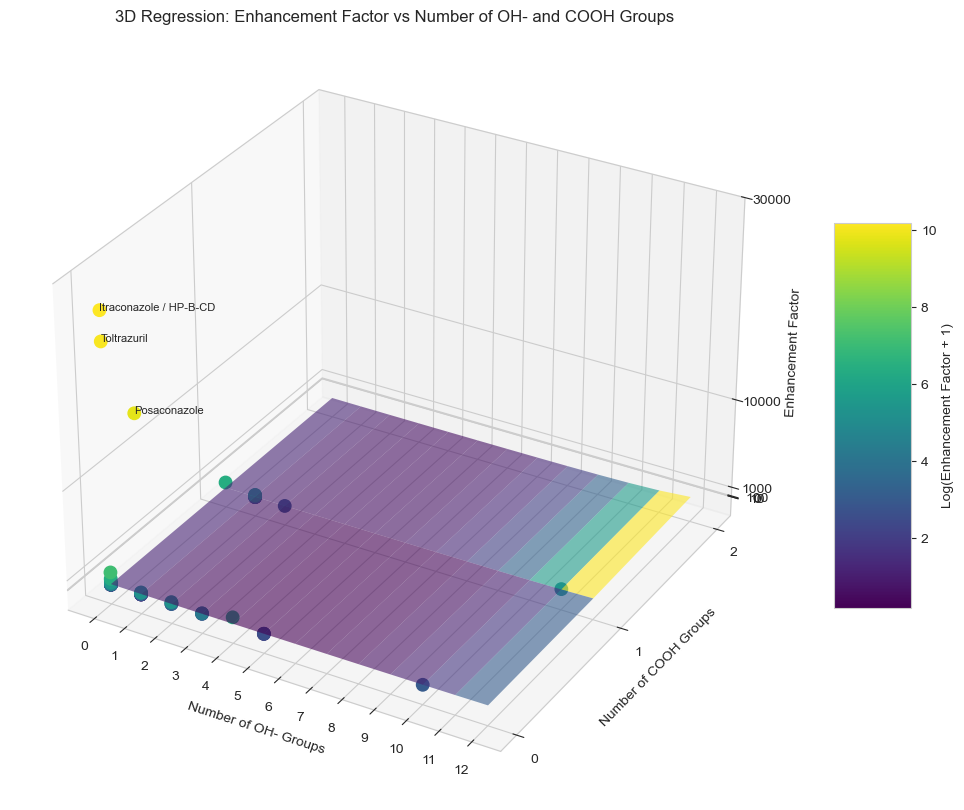

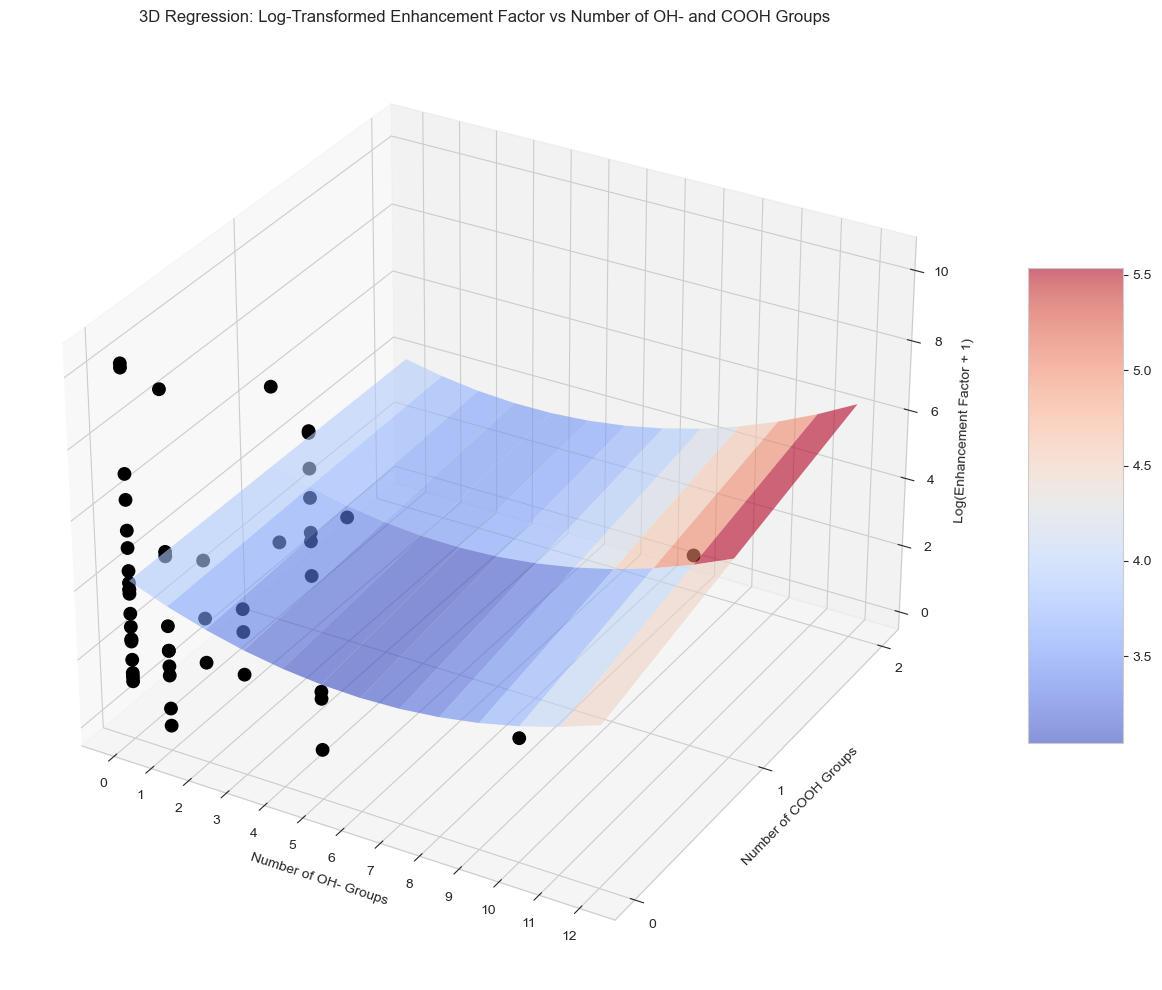

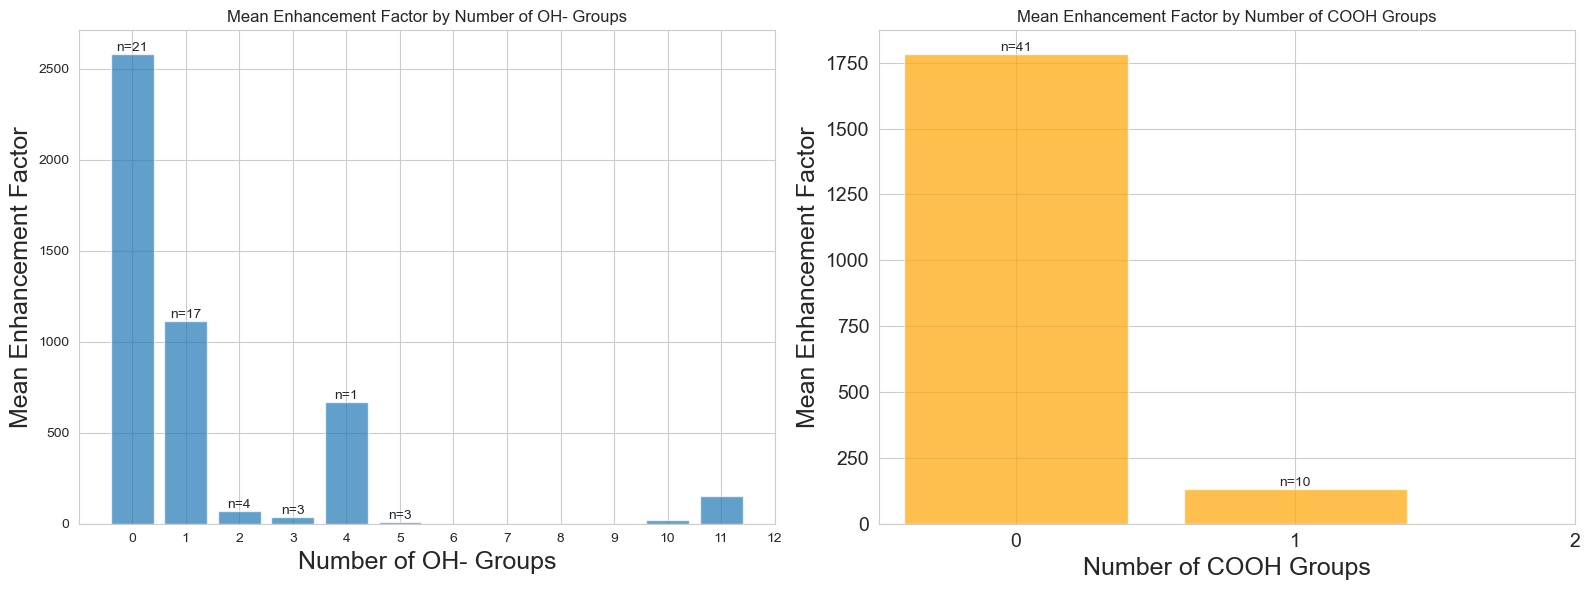

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Read the CSV file
# In a real scenario, you would use: df = pd.read_csv('Featureregression.csv')
# For this example, I'll create the dataframe from the provided data
data = {
    'ID': list(range(1, 52)),
    'Name': [
        'Ibuprofen / HP-B-CD', 'Dexamethasone / B - CD', 'Piroxicam / HP-B-CD', 
        'Hydrocortisone / HP-B-CD', 'Albendazole / RM-B-CD', 'Valtarsan / B-CD',
        'Nifedipine / HP-B-CD', 'Nimodipine / HP-B-CD', 'Carbamazepine / HP-B-CD',
        'Itraconazole / HP-B-CD', 'Simvastatin / HP-B-CD', 'Curcumin / HP-B-CD',
        'Indomethacin / HP- B - CD', 'Naproxen / HP - B - CD', 'Diclofenac / HP-B-CD',
        'Resveratrol / HP-Gamma CD', 'Amphotericin B', 'Budesonide', 'Cefixime',
        'Cefpodoxime proxetil', 'Ceftiofur', 'Danazol', 'Ketoconazole', 'Mebendazole',
        'Metronidazole benzoate', 'Paclitaxel', 'Posaconazole', 'Sulfamethoxazole',
        'Tinidazole', 'Toltrazuril', 'Tropicamide', 'Voriconazole', 'Flurbiprofen',
        'Fenofibrate', 'Bicalutamide', 'Haloperidol', 'Lamotrigine', 'Gilpizide',
        'Amlodipine', 'Carvedilol', 'Nitrendipine', 'Furosemide', 'Silymarin (Silybin A)',
        'Rutin', 'Ezetimibe', 'Efonidipine', 'Bisoprolol', 'Miconazole', 'Erythomycin',
        'Azithromycin', 'Piperine'
    ],
    'Enhancement Factor': [
        30, 10, 4.347826087, 71.4, 600, 590.783, 44.8, 22, 45.6, 27000, 6, 206,
        10, 208.7049, 7.5, 36.66666667, 150, 38.40909091, 23.02631579, 2.643153527,
        72.66666667, 0.221698113, 151.7647059, 78, 9.928571429, 666.6666667, 18000,
        2.186046512, 9.811170213, 24029.12621, 21.5, 10, 220, 40, 10.05649718,
        189.3203883, 14.70588235, 9.243243243, 3.071672355, 166.6666667, 1250, 2,
        12.5, 20, 10, 250, 1.026785714, 55, 1.5, 10, 5
    ],
    'No_of_OH_groups': [
        1, 3, 1, 3, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 3, 11, 2, 2, 0, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 5, 10, 2, 0, 1, 0, 5, 5, 0
    ],
    'No_of_COOH': [
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ]
}

df = pd.DataFrame(data)

# Extract the columns of interest
X = df[['No_of_OH_groups', 'No_of_COOH']].values
y = df['Enhancement Factor'].values

# Log transform the enhancement factor due to high variance
y_log = np.log1p(y)  # log(1+y)

# Create a polynomial regression model
degree = 2  # Polynomial degree
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y_log)

# Create a meshgrid for prediction
# Since these are integer values, we'll use a discrete grid
x_range = np.arange(0, X[:, 0].max() + 2)
y_range = np.arange(0, X[:, 1].max() + 2)
xx, yy = np.meshgrid(x_range, y_range)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on the grid
Z = model.predict(grid)
Z = np.expm1(Z)  # Convert back from log scale
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface as a wireframe for better visibility with discrete data
surf = ax.plot_wireframe(xx, yy, Z, color='blue', alpha=0.5)

# Plot the original data points
scatter = ax.scatter(X[:, 0], X[:, 1], y, c='black', s=50, alpha=1)

# Add labels for compounds with high enhancement factors
high_enhancement = y > 1000
for i in np.where(high_enhancement)[0]:
    ax.text(X[i, 0], X[i, 1], y[i], df['Name'][i], fontsize=8)

# Set labels and title
ax.set_xlabel('Number of OH- Groups')
ax.set_ylabel('Number of COOH Groups')
ax.set_zlabel('Enhancement Factor')
ax.set_title('3D Regression: Enhancement Factor vs Number of OH- and COOH Groups')
ax.set_xticks(np.arange(0, X[:, 0].max() + 2))
ax.set_yticks(np.arange(0, X[:, 1].max() + 2))

# Add a statistical summary
r2_score = model.score(X, y_log)
plt.figtext(0.15, 0.05, f"Polynomial Regression (degree={degree})\nR² score: {r2_score:.4f}", 
           horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()

# Create a second visualization with log scale for better visibility
fig2 = plt.figure(figsize=(14, 10))
ax2 = fig2.add_subplot(111, projection='3d')

# Plot the surface
surf2 = ax2.plot_surface(xx, yy, Z, cmap=cm.viridis, alpha=0.6,
                       linewidth=0, antialiased=True)

# Plot the data points
scatter2 = ax2.scatter(X[:, 0], X[:, 1], y, c=np.log1p(y), cmap=cm.viridis, s=80, alpha=1)

# Add point labels
for i, name in enumerate(df['Name']):
    if y[i] > 5000:  # Only label points with very high enhancement factors
        ax2.text(X[i, 0], X[i, 1], y[i], name, fontsize=8)

# Set labels and title
ax2.set_xlabel('Number of OH- Groups')
ax2.set_ylabel('Number of COOH Groups')
ax2.set_zlabel('Enhancement Factor')
ax2.set_zticks([0, 10, 100, 1000, 10000, 30000])
ax2.set_title('3D Regression: Enhancement Factor vs Number of OH- and COOH Groups')
ax2.set_xticks(np.arange(0, X[:, 0].max() + 2))
ax2.set_yticks(np.arange(0, X[:, 1].max() + 2))

# Add colorbar
fig2.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5, label='Log(Enhancement Factor + 1)')

# Create a third visualization showing log scale of enhancement factor
fig3 = plt.figure(figsize=(14, 10))
ax3 = fig3.add_subplot(111, projection='3d')

# Plot the surface with log scale
Z_log = np.log1p(Z)
surf3 = ax3.plot_surface(xx, yy, Z_log, cmap=cm.coolwarm, alpha=0.6,
                       linewidth=0, antialiased=True)

# Plot the data points with log scale
scatter3 = ax3.scatter(X[:, 0], X[:, 1], np.log1p(y), c='black', s=80, alpha=1)

# Set labels and title
ax3.set_xlabel('Number of OH- Groups')
ax3.set_ylabel('Number of COOH Groups')
ax3.set_zlabel('Log(Enhancement Factor + 1)')
ax3.set_title('3D Regression: Log-Transformed Enhancement Factor vs Number of OH- and COOH Groups')
ax3.set_xticks(np.arange(0, X[:, 0].max() + 2))
ax3.set_yticks(np.arange(0, X[:, 1].max() + 2))

# Add a statistical summary
#plt.figtext(0.15, 0.05, f"Polynomial Regression (degree={degree})\nR² score: {r2_score:.4f}", 
           #horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar
fig3.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)

plt.tight_layout()

# Print summary of the model
print(f"Polynomial Regression Model (degree={degree}):")
print(f"R² score: {r2_score:.4f}")

# Feature importance analysis
coefficients = model.named_steps['linearregression'].coef_
feature_names = model.named_steps['polynomialfeatures'].get_feature_names_out(['OH_groups', 'COOH'])
importance = np.abs(coefficients)

# Sort features by importance
indices = np.argsort(importance)[::-1]
print("\nFeature importance:")
for i in indices:
    if coefficients[i] != 0:
        print(f"{feature_names[i]}: {coefficients[i]:.4f}")

# Distribution of data points
fig4, (ax4, ax5) = plt.subplots(1, 2, figsize=(16, 6))

# Distribution by OH groups
grouped_by_oh = df.groupby('No_of_OH_groups')['Enhancement Factor'].agg(['mean', 'median', 'count'])
ax4.bar(grouped_by_oh.index, grouped_by_oh['mean'], alpha=0.7)
ax4.set_xlabel('Number of OH- Groups', fontsize=18)
ax4.set_ylabel('Mean Enhancement Factor', fontsize=18)
ax4.set_title('Mean Enhancement Factor by Number of OH- Groups')
ax4.set_xticks(np.arange(0, X[:, 0].max() + 2))

# Add count labels
for i, count in enumerate(grouped_by_oh['count']):
    if i in grouped_by_oh.index:
        ax4.text(i, grouped_by_oh.loc[i, 'mean'], f"n={count}", ha='center', va='bottom')

# Distribution by COOH groups
grouped_by_cooh = df.groupby('No_of_COOH')['Enhancement Factor'].agg(['mean', 'median', 'count'])
ax5.bar(grouped_by_cooh.index, grouped_by_cooh['mean'], alpha=0.7, color='orange')
ax5.set_xlabel('Number of COOH Groups', fontsize=18)
ax5.set_ylabel('Mean Enhancement Factor', fontsize=18)
ax5.set_title('Mean Enhancement Factor by Number of COOH Groups')
ax5.set_xticks(np.arange(0, X[:, 1].max() + 2))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add count labels
for i, count in enumerate(grouped_by_cooh['count']):
    if i in grouped_by_cooh.index:
        ax5.text(i, grouped_by_cooh.loc[i, 'mean'], f"n={count}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

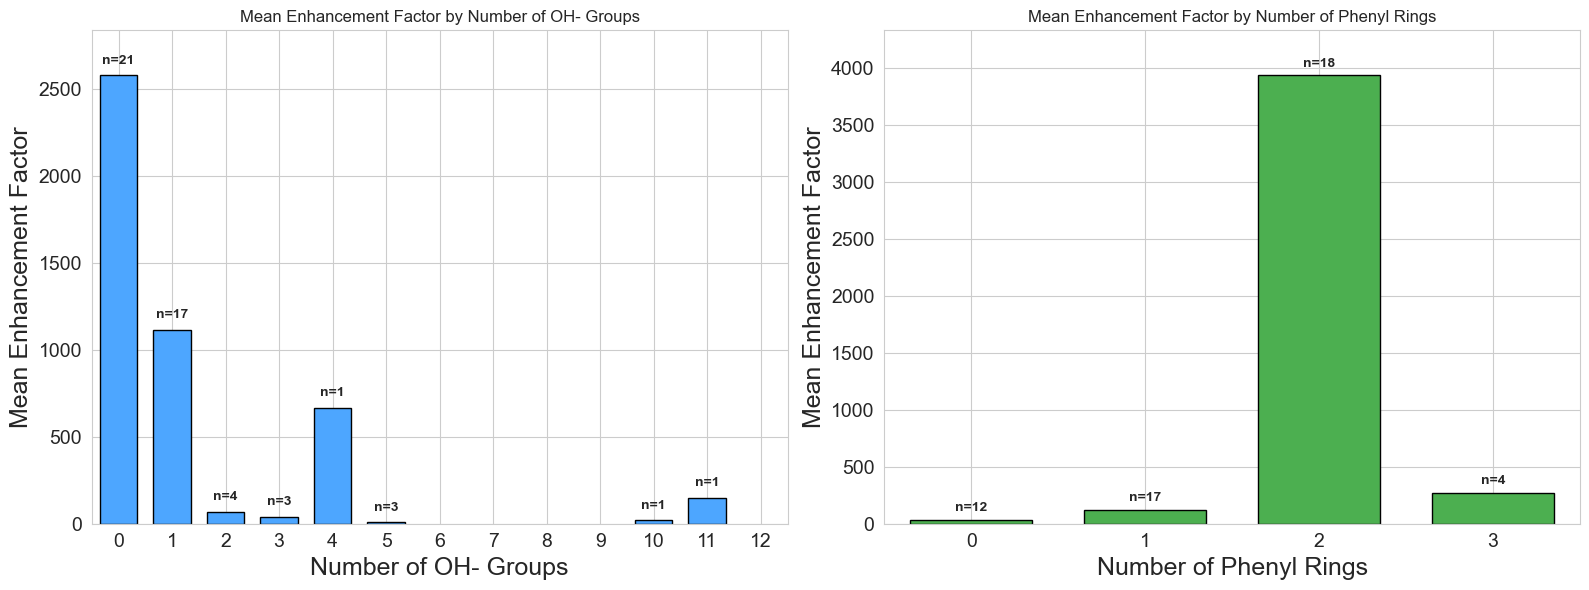

Mean Enhancement Factor by Number of OH- Groups:
   No. of OH- groups  Enhancement Factor
0                  0         2581.603031
1                  1         1115.294790
2                  2           69.358852
3                  3           39.355556
4                  4          666.666667
5                  5            8.000000
6                 10           20.000000
7                 11          150.000000

Sample counts for OH- Groups:
No. of OH- groups
0     21
1     17
2      4
3      3
4      1
5      3
10     1
11     1
dtype: int64

Mean Enhancement Factor by Number of Phenyl Rings:
   No. of Phenyl Rings  Enhancement Factor
0                    0           32.973175
1                    1          119.988825
2                    2         3938.806798
3                    3          273.958333

Sample counts for Phenyl Rings:
No. of Phenyl Rings
0    12
1    17
2    18
3     4
dtype: int64


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'C:/Users/gagno/Downloads/Featureregression.csv'
data = pd.read_csv(file_path)

# Set the style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))

# Bar plot for OH groups - LEFT PLOT
plt.subplot(1, 2, 1)
oh_groups = data.groupby('No. of OH- groups')['Enhancement Factor'].mean().reset_index()
oh_counts = data.groupby('No. of OH- groups').size()

# Create bar plot
bars = plt.bar(oh_groups['No. of OH- groups'], oh_groups['Enhancement Factor'], 
        color='#4da6ff', edgecolor='black', width=0.7)

# Add sample count for each group above bars
for i, count in enumerate(oh_counts):
    plt.text(oh_groups['No. of OH- groups'].iloc[i], 
             oh_groups['Enhancement Factor'].iloc[i] + 50,  # Position just above bar
             f'n={count}', ha='center', va='bottom', fontweight='bold')

plt.title('Mean Enhancement Factor by Number of OH- Groups', fontsize=12)
plt.xlabel('Number of OH- Groups', fontsize=18)
plt.ylabel('Mean Enhancement Factor', fontsize=18)
plt.yticks(fontsize=14)
# Set x-axis to show all possible values from 0 to max+1 for consistency
max_oh = int(data['No. of OH- groups'].max())
plt.xticks(range(0, max_oh + 2), fontsize=14)
plt.xlim(-0.5, max_oh + 1.5)
plt.yticks(fontsize=14)

# Set y-axis to match the scale of your reference image
y_max = max(oh_groups['Enhancement Factor']) * 1.1  # Add 10% padding
plt.ylim(0, y_max)

# Bar plot for Phenyl Rings - RIGHT PLOT
plt.subplot(1, 2, 2)
phenyl_groups = data.groupby('No. of Phenyl Rings')['Enhancement Factor'].mean().reset_index()
phenyl_counts = data.groupby('No. of Phenyl Rings').size()

# Create bar plot
bars = plt.bar(phenyl_groups['No. of Phenyl Rings'], phenyl_groups['Enhancement Factor'], 
        color='#4CAF50', edgecolor='black', width=0.7)

# Add sample count for each group above bars
for i, count in enumerate(phenyl_counts):
    plt.text(phenyl_groups['No. of Phenyl Rings'].iloc[i], 
             phenyl_groups['Enhancement Factor'].iloc[i] + 50,  # Position just above bar
             f'n={count}', ha='center', va='bottom', fontweight='bold')

plt.title('Mean Enhancement Factor by Number of Phenyl Rings', fontsize=12)
plt.xlabel('Number of Phenyl Rings', fontsize=18)
plt.ylabel('Mean Enhancement Factor', fontsize=18)

# Set x-axis to show all possible values from 0 to max+1 for consistency
max_phenyl = int(data['No. of Phenyl Rings'].max())
plt.xticks(range(0, max_phenyl + 1), fontsize=14)
plt.xlim(-0.5, max_phenyl + 0.5)
plt.yticks(fontsize=14)

# Set y-axis to match the scale of your reference image
y_max = max(phenyl_groups['Enhancement Factor']) * 1.1  # Add 10% padding
plt.ylim(0, y_max)

plt.tight_layout()
plt.savefig('reformatted_enhancement_factor_barplots.png', dpi=300)
plt.show()

# Print the mean enhancement factors for each group for reference
print("Mean Enhancement Factor by Number of OH- Groups:")
print(oh_groups)
print("\nSample counts for OH- Groups:")
print(oh_counts)

print("\nMean Enhancement Factor by Number of Phenyl Rings:")
print(phenyl_groups)
print("\nSample counts for Phenyl Rings:")
print(phenyl_counts)

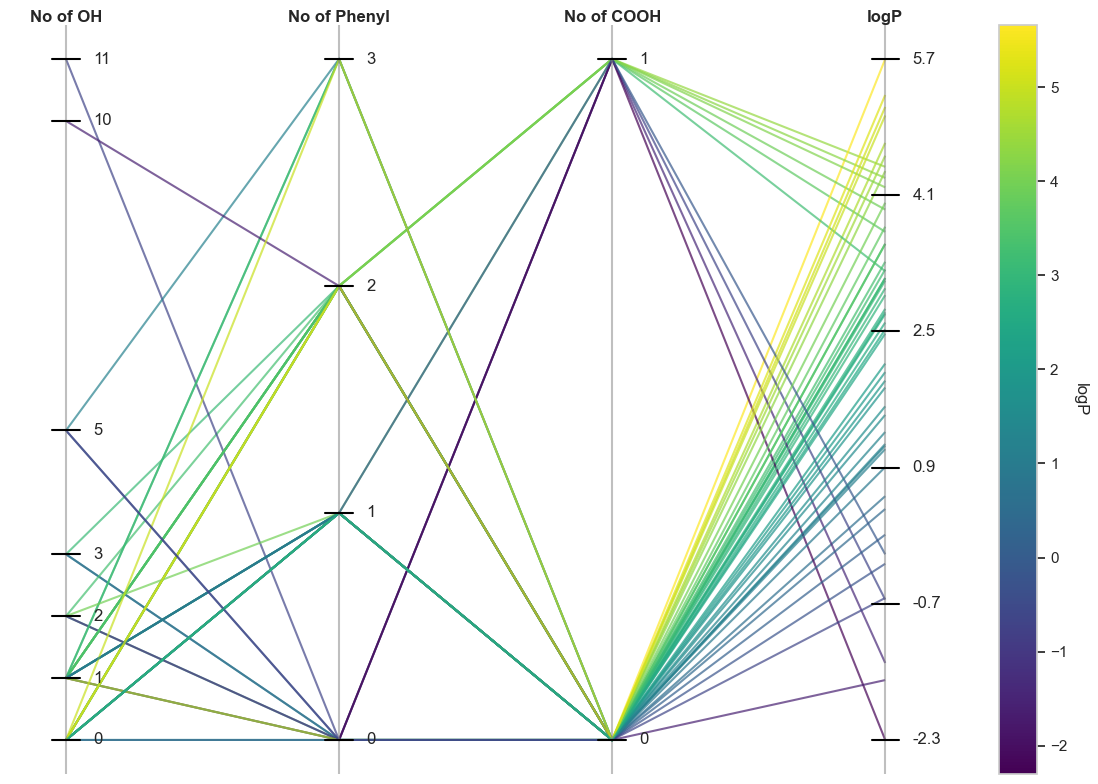

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

# Create DataFrame from the image data
data = {
    'ID': list(range(1, 52)),
    'Name': [
        'Ibuprofen / HP-B-CD', 'Dexamethasone / B- CD', 'Piroxicam / HP-B-CD',
        'Hydrocortisone / HP-B-CD', 'Albendazole / RM-B-CD', 'Valtarsan / B-CD',
        'Nifedipine / HP-B-CD', 'Nitrendipine / HP-B-CD', 'Carbamazepine / HP-B-CD',
        'Itraconazole / HP-B-CD', 'Simvastatin / HP-B-CD', 'Curcumin / HP-B-CD',
        'Indomethacin / HP-B - CD', 'Naproxen / HP- B - CD', 'Diclofenac / HP-B-CD',
        'Resveratrol / HP-Gamma CD', 'Amphotericin B', 'Budesonide',
        'Cefixime', 'Cefpodoxime proxetil', 'Ceftiofur',
        'Danazol', 'Ketoconazole', 'Mebendazole',
        'Metronidazole benzoate', 'Tacrolimus', 'Posaconazole',
        'Sulfamethoxazole', 'Tinidazole', 'Toltrazuril',
        'Tropicamide', 'Voriconazole', 'Aceclofenac',
        'Fenofibrate', 'Bicalutamide', 'Haloperidol',
        'Lamotrigine', 'Glipizide', 'Amlodipine',
        'Bosentan', 'Nitrendipine', 'Furosemide',
        'Silymarin (Silybin A)', 'Rutin', 'Ezetimibe',
        'Efonidipine', 'Esomeprazole', 'Miconazole',
        'Erythromycin', 'Azithromycin', 'Piperine'
    ],
    'No_of_OH': [1, 3, 1, 3, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 3, 11, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 5, 10, 2, 0, 1, 0, 5, 5, 0],
    'logP': [3.64, 1.14, 3.07, 0.55, 2.9, 4.4, 1.82, 3.1, 2.45, 5.66, 4.68, 3.29, 4.27, 3.18, 3.9, 3.1, -0.66, 2.7, -1.4, 2, -2.3, 4.53, 4.35, 2.74, 1.1, 3.5, 3.7, 0.89, 0.1, 2.5, 1.6, 1.5, 4.16, 5.24, 2.68, 3.5, 1.9, 0.4, 2.1, 2.98, 3.2, -0.13, 1.16, -1.6, 3.98, 5, 1.3, 5.1, -0.24, -0.64, 2.58],
    'No_of_Phenyl': [1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 3, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 3, 2, 1, 3, 1, 2, 0, 0, 1],
    'No_of_COOH': [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Select columns for parallel coordinates plot
selected_cols = ['No_of_OH', 'No_of_Phenyl', 'No_of_COOH', 'logP']
df_selected = df[selected_cols]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define the positions of the axes
x_pos = np.arange(len(selected_cols))
x_pos = x_pos * 2  # Spread out the axes

# Normalize the data to the range [0, 1]
def normalize(col):
    min_val = df_selected[col].min()
    max_val = df_selected[col].max()
    return (df_selected[col] - min_val) / (max_val - min_val) if max_val > min_val else df_selected[col] * 0

df_norm = df_selected.copy()
for col in selected_cols:
    df_norm[col] = normalize(col)

# Set colormap based on logP values (last column)
cmap = plt.cm.viridis
norm = plt.Normalize(df['logP'].min(), df['logP'].max())

# Draw each data item
for i, (_, row) in enumerate(df.iterrows()):
    # Get the normalized values
    norm_row = df_norm.iloc[i]
    y_values = norm_row.values
    
    # Color based on logP value
    color = cmap(norm(row['logP']))
    
    # Create the path
    verts = np.column_stack([x_pos, y_values])
    codes = [Path.MOVETO] + [Path.LINETO] * (len(verts) - 1)
    path = Path(verts, codes)
    patch = patches.PathPatch(path, edgecolor=color, facecolor='none', lw=1.5, alpha=0.7)
    ax.add_patch(patch)

# Draw the axes
for i, col in enumerate(selected_cols):
    ax.axvline(x_pos[i], ymin=0, ymax=1, color='gray', alpha=0.5)
    
    # Draw ticks for each axis
    if col in ['No_of_OH', 'No_of_Phenyl', 'No_of_COOH']:
        # For discrete variables
        unique_vals = sorted(df[col].unique())
        for val in unique_vals:
            # Calculate the normalized y-position
            min_val = df[col].min()
            max_val = df[col].max()
            y_pos = (val - min_val) / (max_val - min_val) if max_val > min_val else 0
            
            # Add a tick mark
            ax.plot([x_pos[i]-0.1, x_pos[i]+0.1], [y_pos, y_pos], color='black')
            
            # Add a label
            ax.text(x_pos[i]+0.2, y_pos, str(int(val)), verticalalignment='center')
    else:
        # For continuous variables (logP)
        vals = np.linspace(df[col].min(), df[col].max(), 6)
        for val in vals:
            # Calculate the normalized y-position
            y_pos = (val - df[col].min()) / (df[col].max() - df[col].min())
            
            # Add a tick mark
            ax.plot([x_pos[i]-0.1, x_pos[i]+0.1], [y_pos, y_pos], color='black')
            
            # Add a label
            ax.text(x_pos[i]+0.2, y_pos, f"{val:.1f}", verticalalignment='center')

# Add column names as axis labels
for i, col in enumerate(selected_cols):
    readable_name = col.replace('_', ' ')
    ax.text(x_pos[i], 1.05, readable_name, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a color bar for logP values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('logP', rotation=270, labelpad=15)

# Hide regular axes
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set title and adjust layout
plt.title('', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

EState_VSA5 vs Enhancement Factor: r = 0.2772, p-value = 4.8888e-02
MolWeight vs Enhancement Factor:   r = 0.1671, p-value = 2.4128e-01


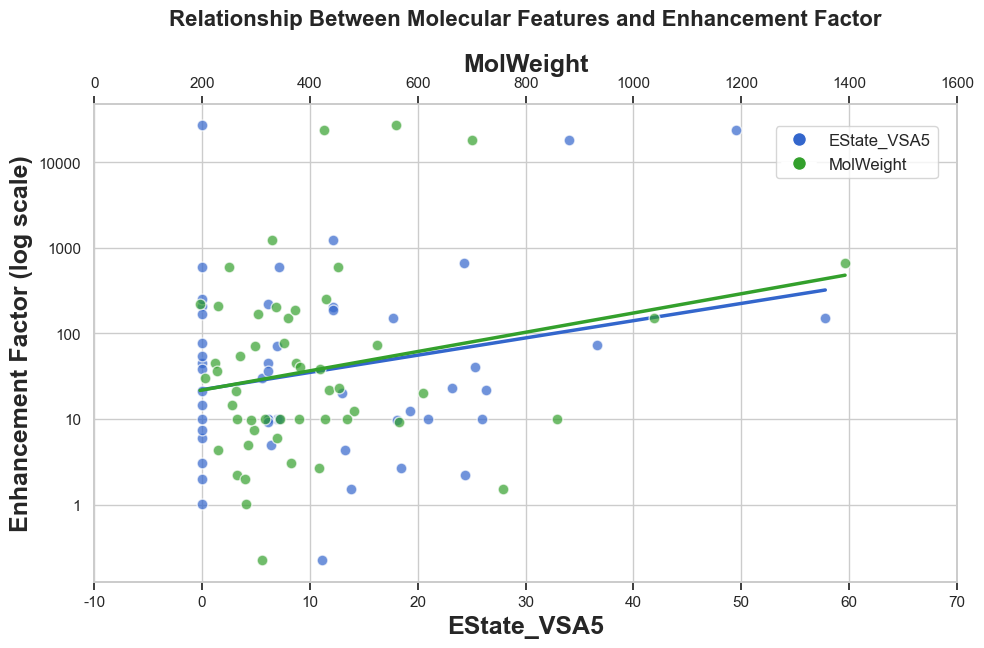

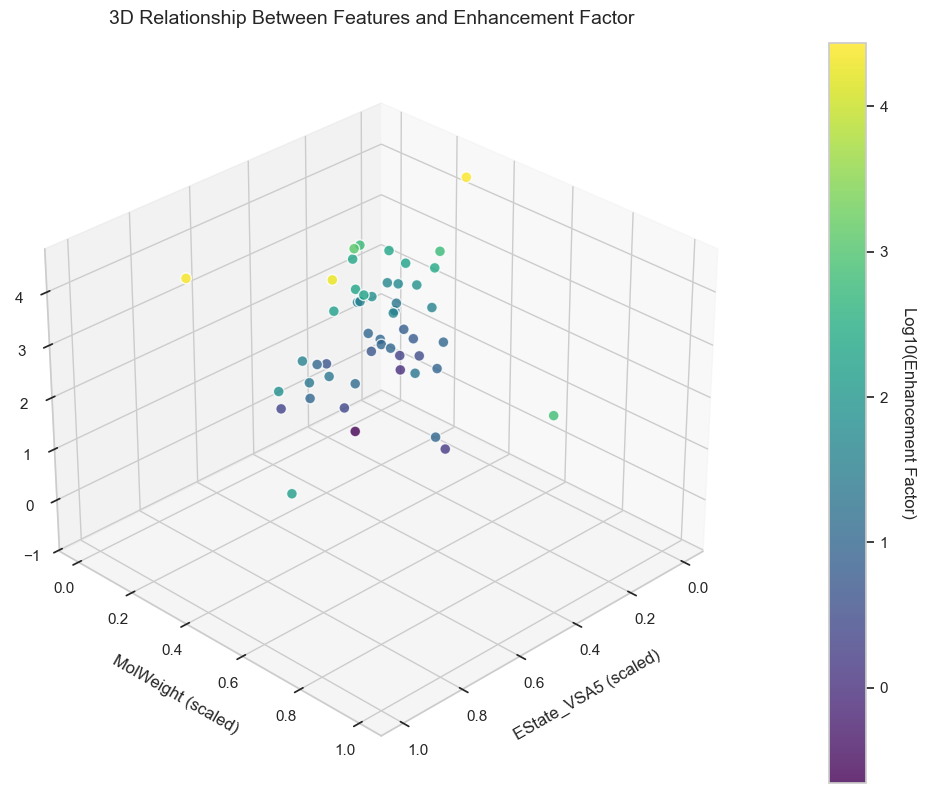

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import ScalarFormatter, MultipleLocator, FormatStrFormatter

# 1. Load the dataset
file_path = 'C:/Users/gagno/Downloads/Featureregression.csv'  # Adjust path as needed
df = pd.read_csv(file_path)

# 2. Extract columns for analysis
x1 = df["EState_VSA5"]   # Predictor 1
x2 = df["MolWeight"]     # Predictor 2
y = df["Enhancement Factor"]

# 3. Compute Pearson correlations separately
corr_val1, p_val1 = pearsonr(x1, y)
corr_val2, p_val2 = pearsonr(x2, y)

correlation_text = (
    f"EState_VSA5 vs Enhancement Factor: r = {corr_val1:.4f}, p-value = {p_val1:.4e}\n"
    f"MolWeight vs Enhancement Factor:   r = {corr_val2:.4f}, p-value = {p_val2:.4e}"
)
print(correlation_text)

# 4. Create figure with two x-axes
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 7))

# Create a secondary x-axis for MolWeight (top axis)
ax2 = ax1.twiny()

# Define custom colors
estate_color = '#3366CC'   # Blue
molweight_color = '#33A02C'  # Green

# 5. Plot EState_VSA5 vs. Enhancement Factor on primary x-axis (bottom)
scatter1 = ax1.scatter(
    x1, y, alpha=0.7, color=estate_color, label='EState_VSA5',
    s=60, edgecolor='white'
)

# Fit and plot regression line for EState_VSA5
x1_range = np.linspace(x1.min(), x1.max(), 100)
z1 = np.polyfit(x1, np.log10(y), 1)
p1 = np.poly1d(z1)
ax1.plot(x1_range, 10**p1(x1_range), color=estate_color, linewidth=2.5)

# 6. Plot MolWeight vs. Enhancement Factor on secondary x-axis (top)
scatter2 = ax2.scatter(
    x2, y, alpha=0.7, color=molweight_color, label='MolWeight',
    s=60, edgecolor='white'
)

# Fit and plot regression line for MolWeight
x2_range = np.linspace(x2.min(), x2.max(), 100)
z2 = np.polyfit(x2, np.log10(y), 1)
p2 = np.poly1d(z2)
ax2.plot(x2_range, 10**p2(x2_range), color=molweight_color, linewidth=2.5)

# 7. Apply logarithmic scale to the y-axis
ax1.set_yscale('log')
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax1.yaxis.set_major_formatter(formatter)

# 8. Set axis labels
ax1.set_xlabel("EState_VSA5", fontsize=18, fontweight='bold')
ax1.set_ylabel("Enhancement Factor (log scale)", fontsize=18, fontweight='bold')
ax2.set_xlabel("MolWeight", fontsize=18, fontweight='bold')

# 9. Add some padding to x-limits
x1_padding = 0.1 * (x1.max() - x1.min())
x2_padding = 0.1 * (x2.max() - x2.min())
ax1.set_xlim(x1.min() - x1_padding, x1.max() + x1_padding)
ax2.set_xlim(x2.min() - x2_padding, x2.max() + x2_padding)

# NEW: Create simple, rounded tick positions for both axes
# For the bottom axis (EState_VSA5)
x1_min, x1_max = ax1.get_xlim()
x1_step = 10  # Use even steps of 10
x1_ticks = np.arange(np.floor(x1_min / x1_step) * x1_step, 
                     np.ceil(x1_max / x1_step) * x1_step + 1, 
                     x1_step)
ax1.set_xticks(x1_ticks)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))  # Format as integers

# For the top axis (MolWeight)
x2_min, x2_max = ax2.get_xlim()
x2_step = 200  # Use even steps of 200
x2_ticks = np.arange(np.floor(x2_min / x2_step) * x2_step, 
                     np.ceil(x2_max / x2_step) * x2_step + 1, 
                     x2_step)
ax2.set_xticks(x2_ticks)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%d'))  # Format as integers

# Create a linear transformation function between x1 and x2 scales
def x2_to_x1(x2_val):
    # Map from x2 scale to x1 scale
    x2_min, x2_max = ax2.get_xlim()
    x1_min, x1_max = ax1.get_xlim()
    return x1_min + (x1_max - x1_min) * (x2_val - x2_min) / (x2_max - x2_min)

# 10. Turn off grid for the top axis to avoid overlapping grid lines
ax2.grid(False)

# 11. Force a draw so the figure is fully rendered, then align ax2 to ax1
fig.canvas.draw()  
ax2.set_position(ax1.get_position())

# 12. Create a legend, placing it somewhere away from the axes
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=estate_color,
               markersize=10, label='EState_VSA5'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=molweight_color,
               markersize=10, label='MolWeight')
]
# Locating in upper left with an offset so it doesn't overlap
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.78, 0.97), fontsize=12)

# 13. Title and layout
plt.title("Relationship Between Molecular Features and Enhancement Factor",
          fontsize=16, fontweight='bold', pad=20)

# Give extra space at the top to avoid clipping the top axis label
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 14. Save & show
plt.savefig('improved_multiple_regression.png', dpi=300, bbox_inches='tight')
plt.show()

# 15. 3D plot (optional)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scale the features to comparable ranges for better visualization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1_scaled = scaler.fit_transform(x1.values.reshape(-1, 1)).flatten()
x2_scaled = scaler.fit_transform(x2.values.reshape(-1, 1)).flatten()
log_y = np.log10(y)  # Log-transform for better visibility

# Create the 3D scatter plot
scatter = ax.scatter(x1_scaled, x2_scaled, log_y, c=log_y, cmap='viridis',
                     s=60, alpha=0.8, edgecolor='w')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Log10(Enhancement Factor)', rotation=270, labelpad=20, fontsize=12)

# Set labels
ax.set_xlabel('EState_VSA5 (scaled)', fontsize=12, labelpad=10)
ax.set_ylabel('MolWeight (scaled)', fontsize=12, labelpad=10)
ax.set_zlabel('Log10(Enhancement Factor)', fontsize=12, labelpad=10)

# Add a title
ax.set_title('3D Relationship Between Features and Enhancement Factor', fontsize=14, pad=20)

# Adjust view
ax.view_init(elev=30, azim=45)
plt.tight_layout()
plt.savefig('3d_feature_relationship.png', dpi=300, bbox_inches='tight')
plt.show()